In [1]:
from color_palette import PaletteCreator

import cv2
import numpy as np
import pandas as pd
import os

In [2]:
pc = PaletteCreator()

In [3]:
data_root = './images/dataset'
seasons = ['spring', 'summer', 'fall', 'winter']

In [4]:
def bgr2cmyk(bgr):
    res_cmyk = []
    bgr = bgr / 255.0
    
    for i in range(len(bgr)):
        b, g, r = bgr[i]
        k = 1 - max(r, g, b)
        c = (1 - r - k) / (1 - k) * 255
        m = (1 - g - k) / (1 - k) * 255
        y = (1 - b - k) / (1 - k) * 255

        tmp = np.array([c, m, y, k])
        res_cmyk.append(tmp)
        
    return np.array(res_cmyk)

c:\Users\pomat\Senior-project\personal-color\color_palette.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(1, len(mean_colors), figsize=(6, 1))


spring: 172 rows


C:\Users\pomat\AppData\Local\Temp\ipykernel_11200\85585611.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat([df, this_df], axis=0)


summer: 141 rows


C:\Users\pomat\AppData\Local\Temp\ipykernel_11200\85585611.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat([df, this_df], axis=0)


fall: 133 rows


C:\Users\pomat\AppData\Local\Temp\ipykernel_11200\85585611.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat([df, this_df], axis=0)


winter: 195 rows


C:\Users\pomat\AppData\Local\Temp\ipykernel_11200\85585611.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat([df, this_df], axis=0)


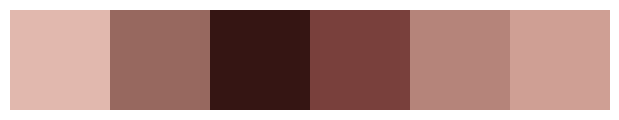

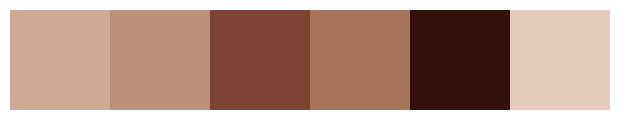

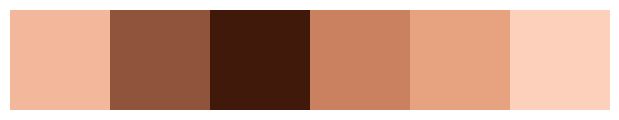

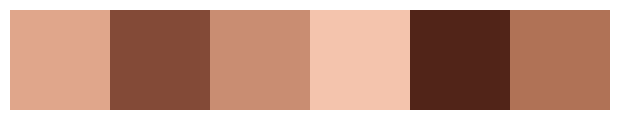

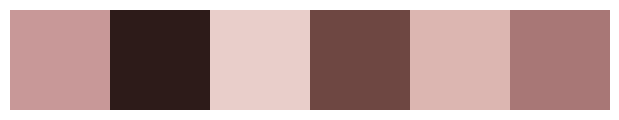

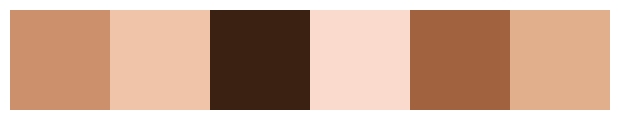

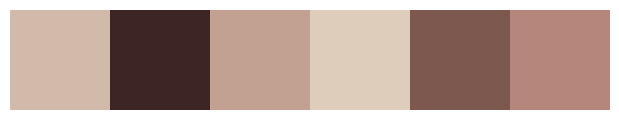

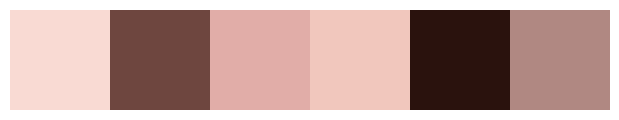

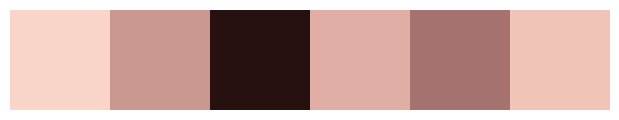

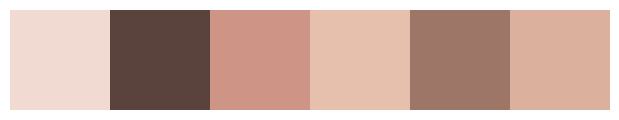

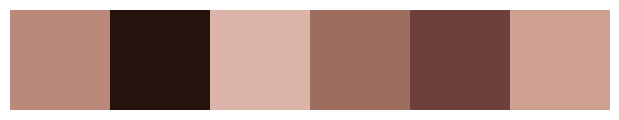

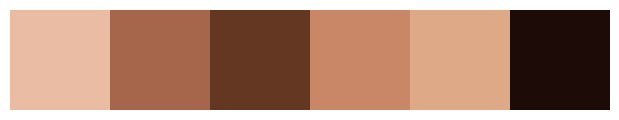

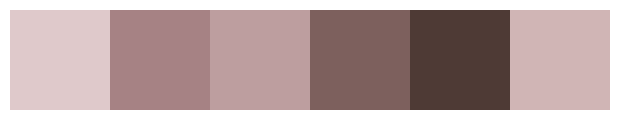

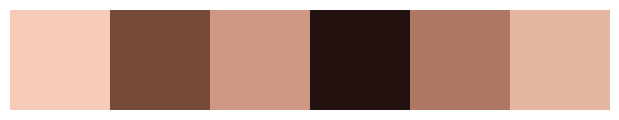

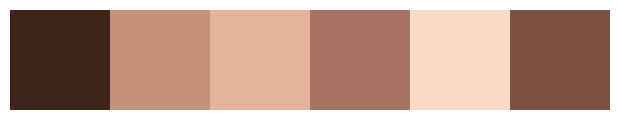

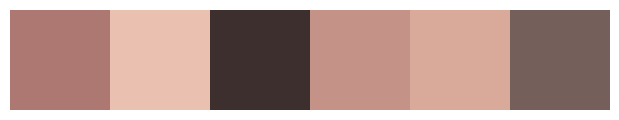

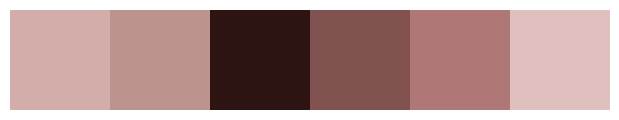

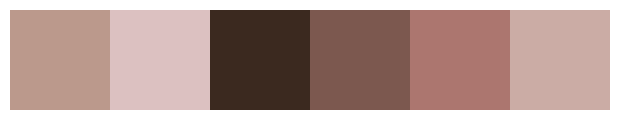

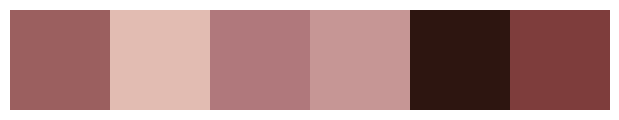

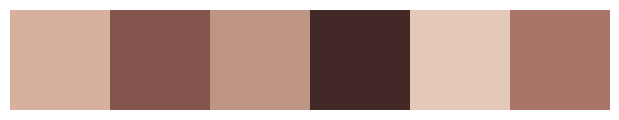

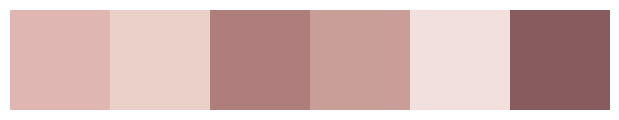

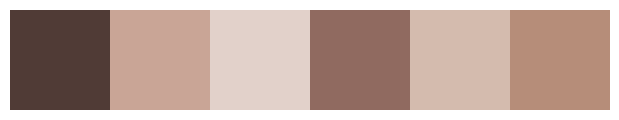

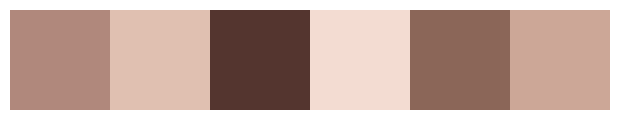

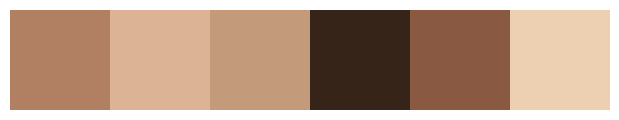

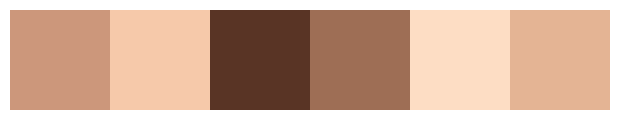

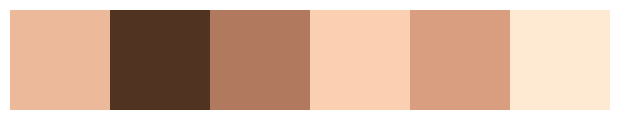

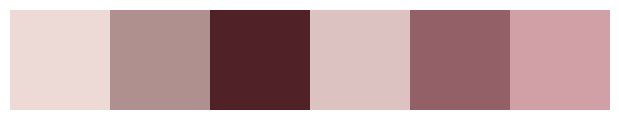

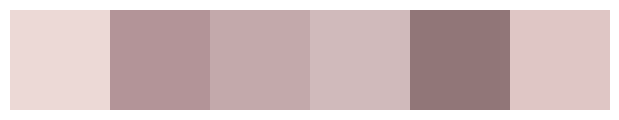

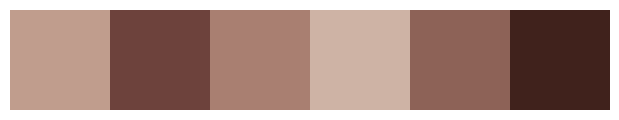

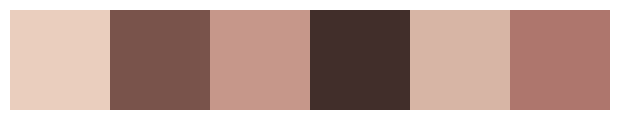

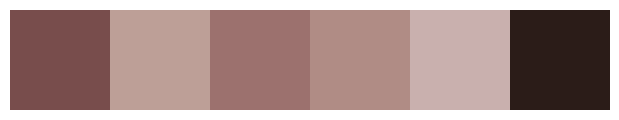

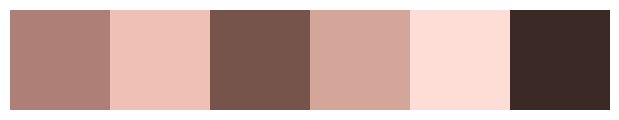

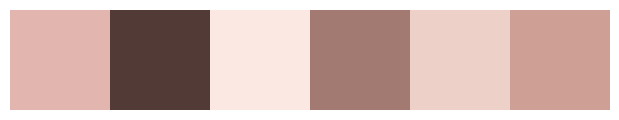

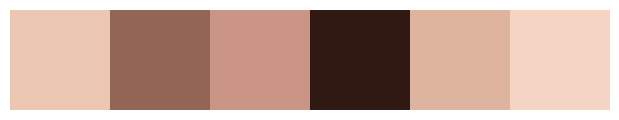

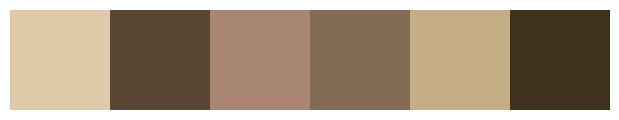

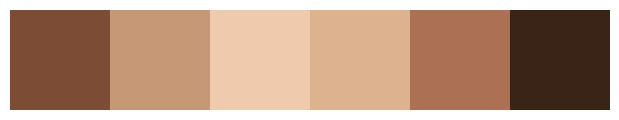

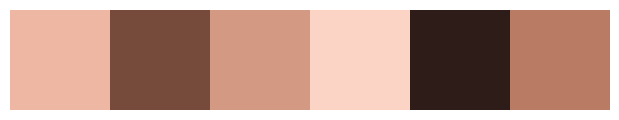

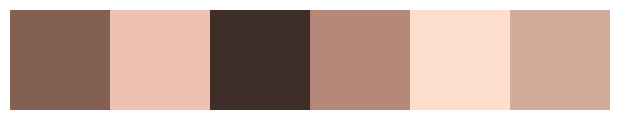

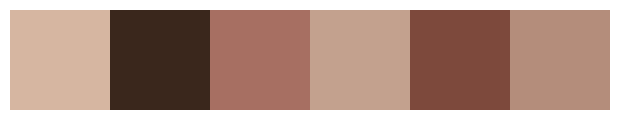

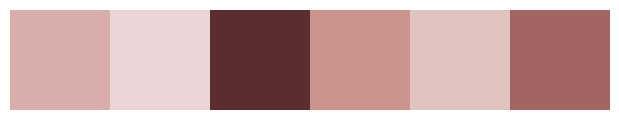

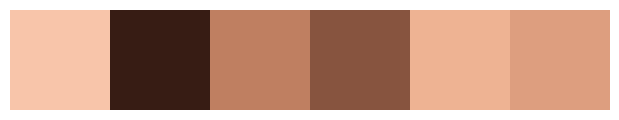

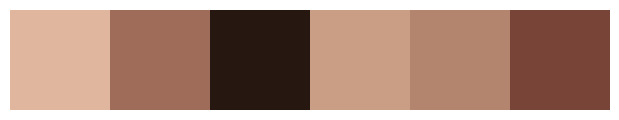

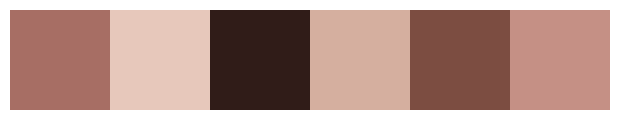

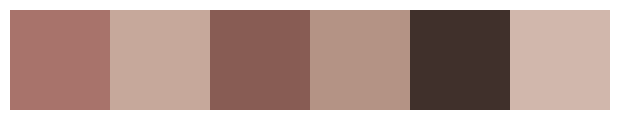

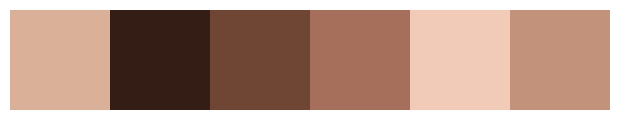

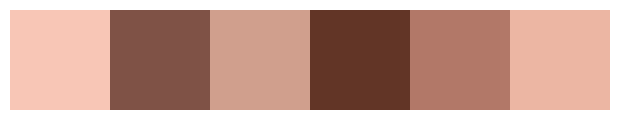

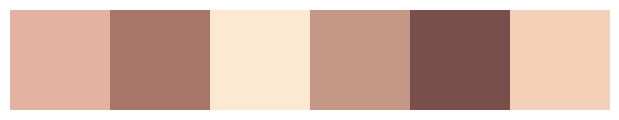

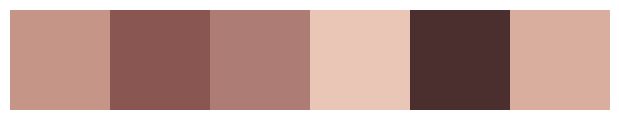

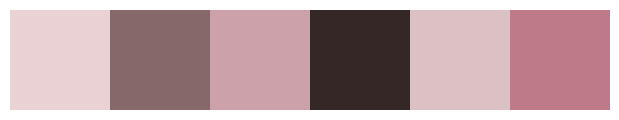

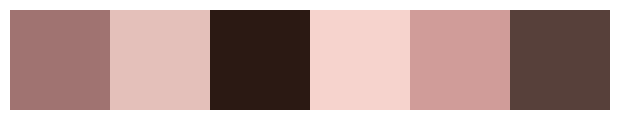

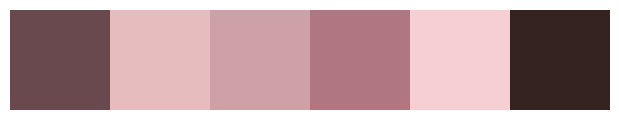

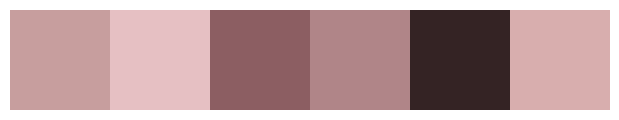

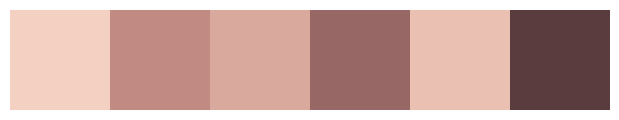

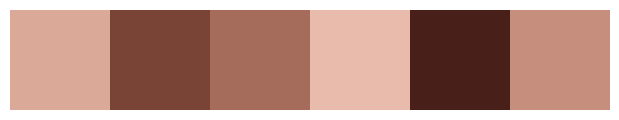

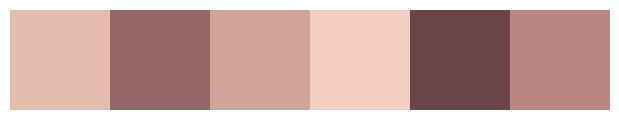

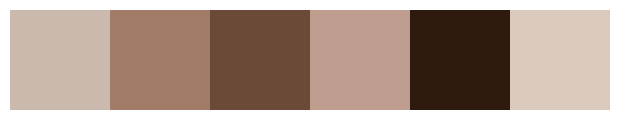

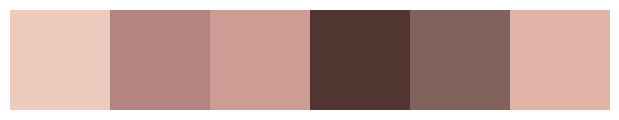

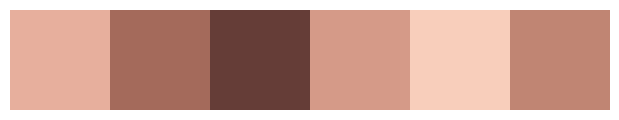

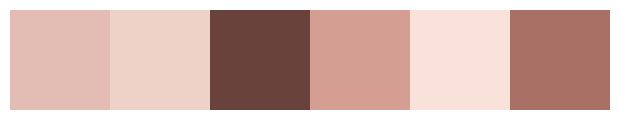

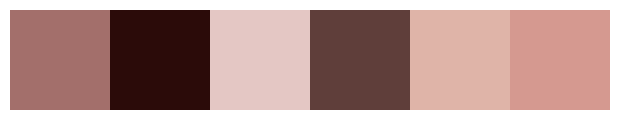

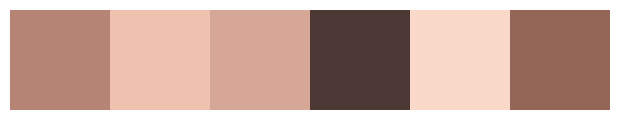

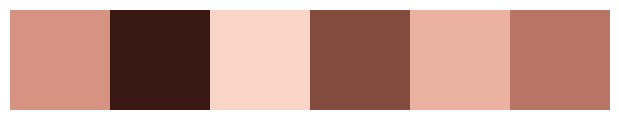

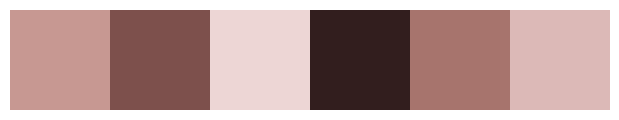

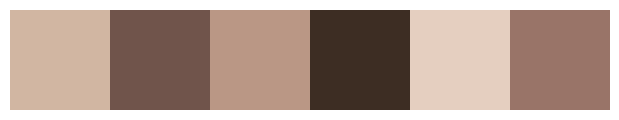

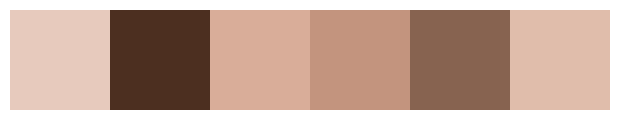

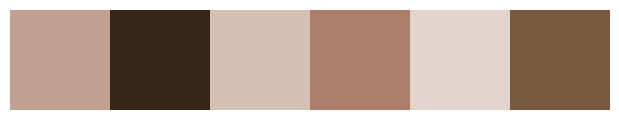

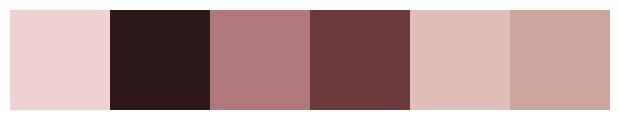

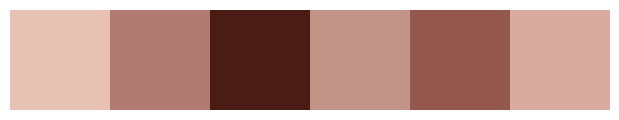

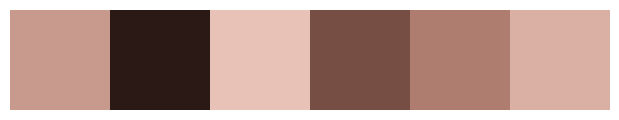

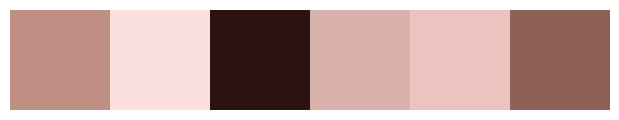

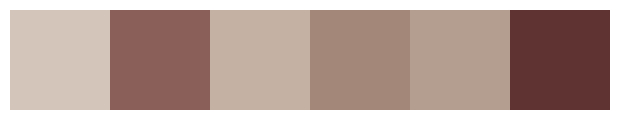

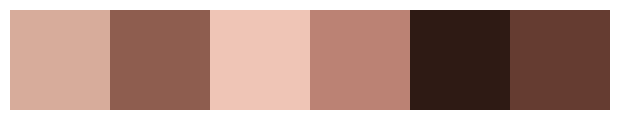

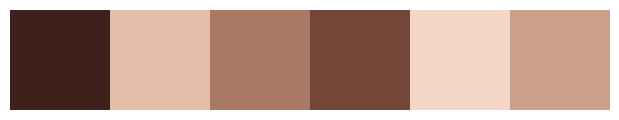

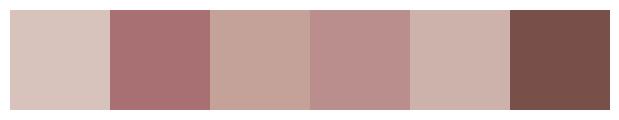

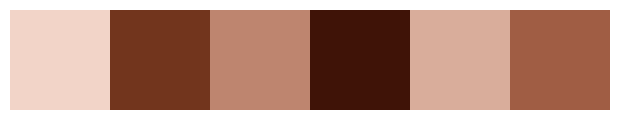

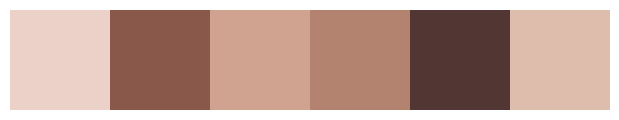

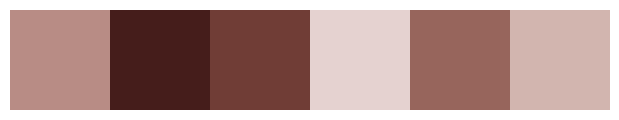

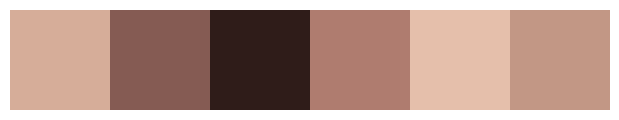

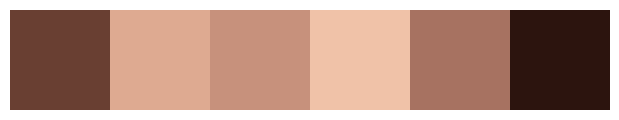

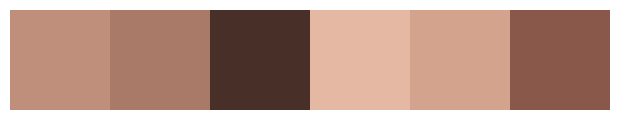

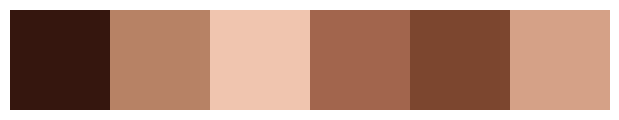

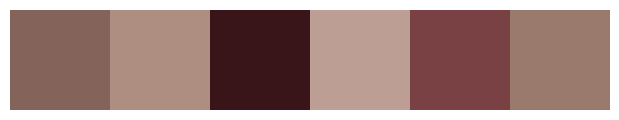

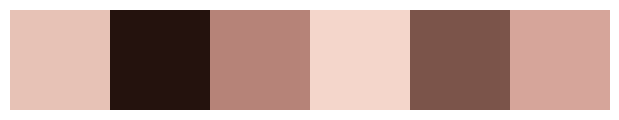

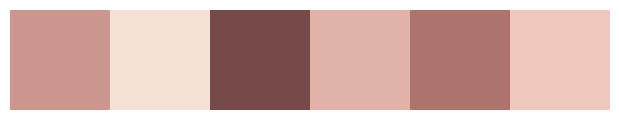

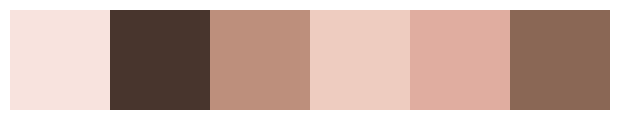

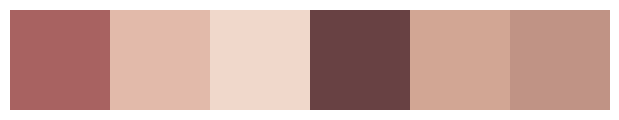

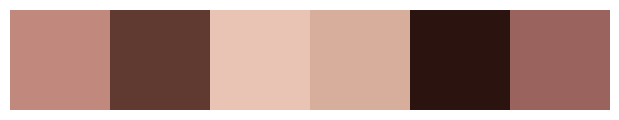

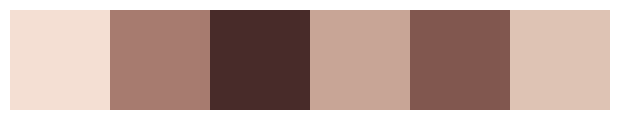

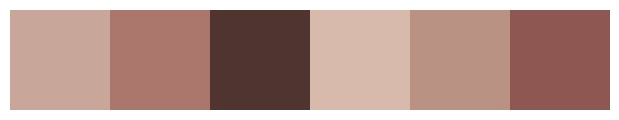

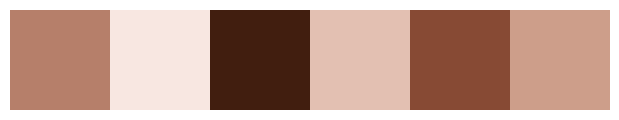

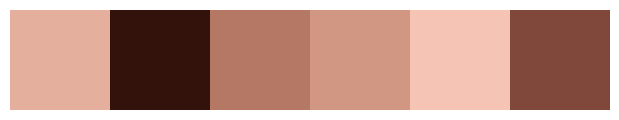

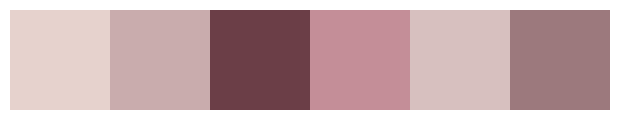

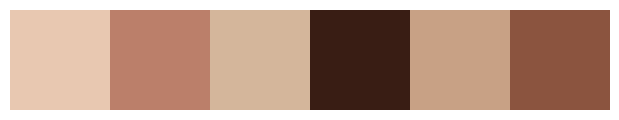

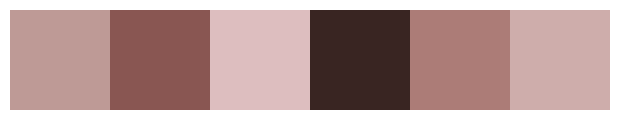

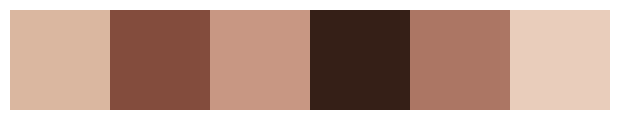

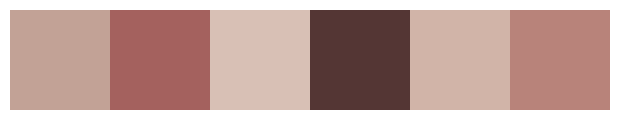

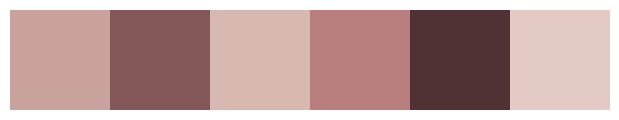

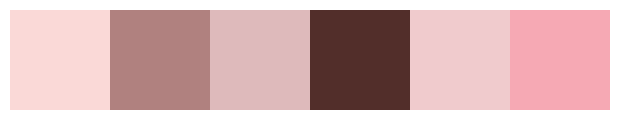

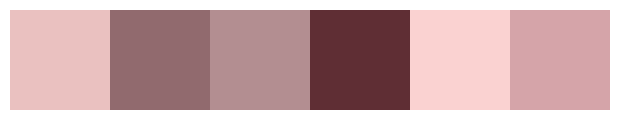

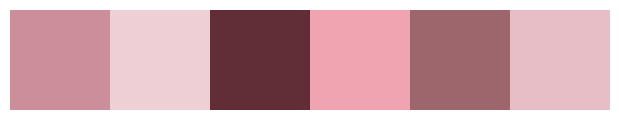

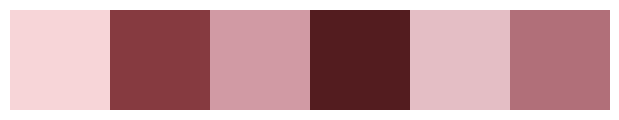

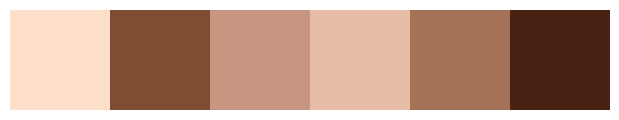

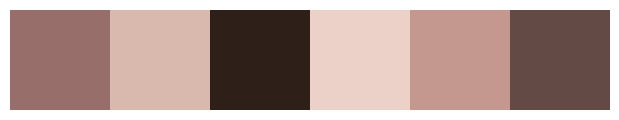

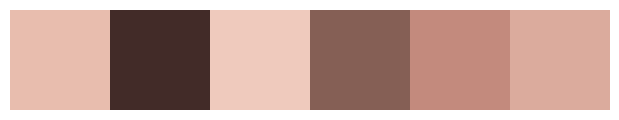

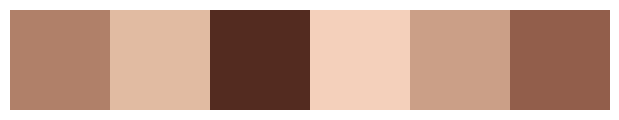

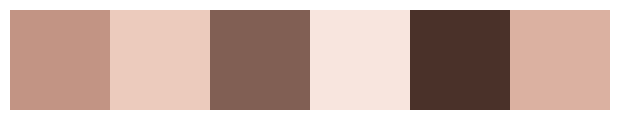

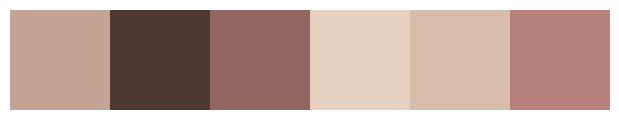

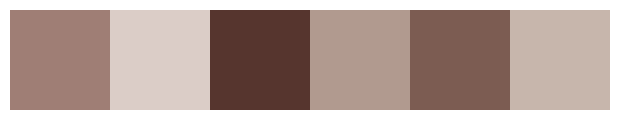

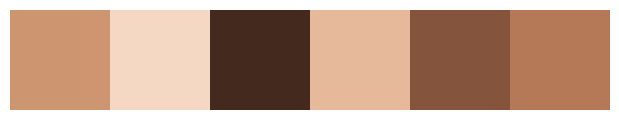

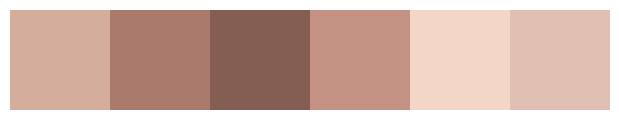

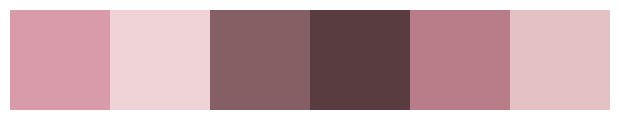

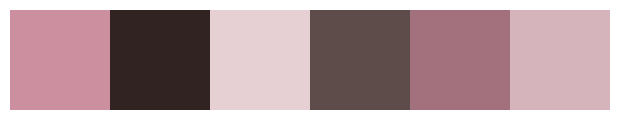

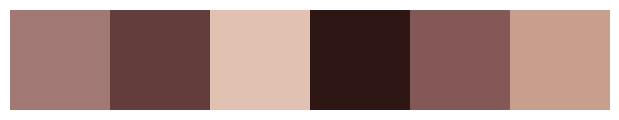

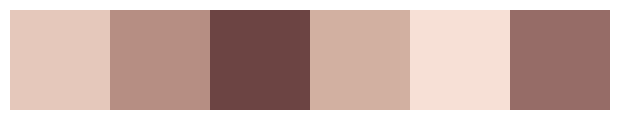

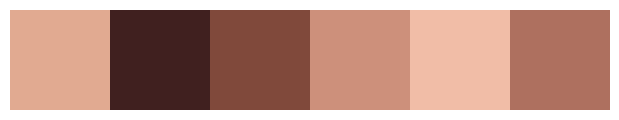

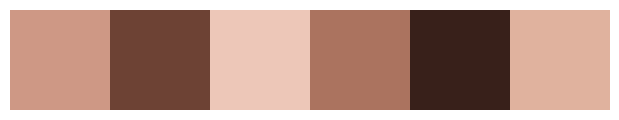

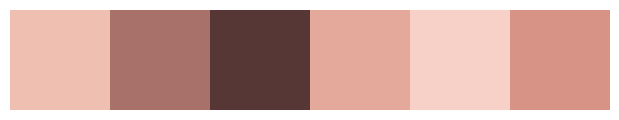

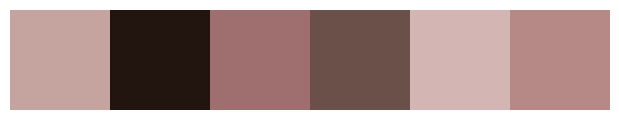

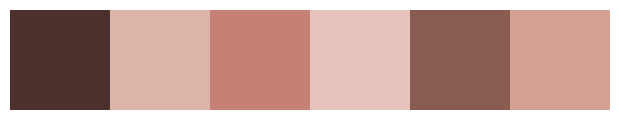

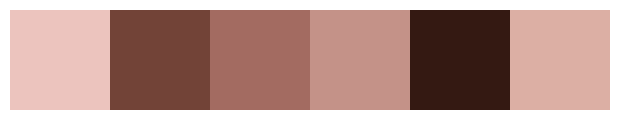

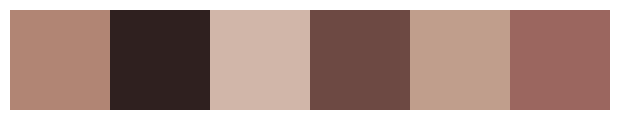

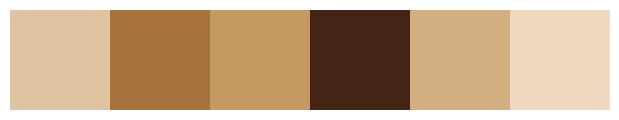

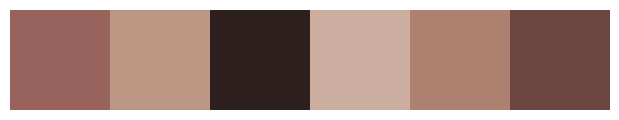

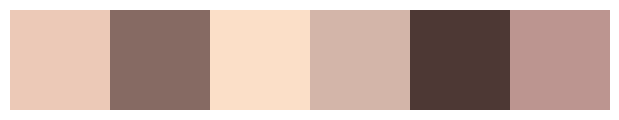

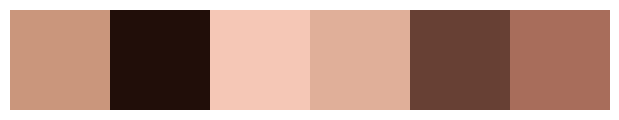

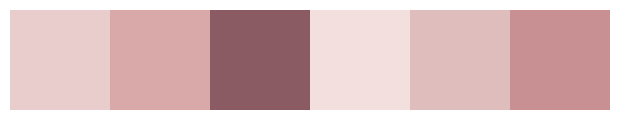

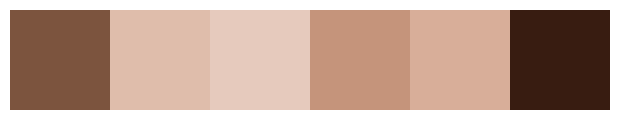

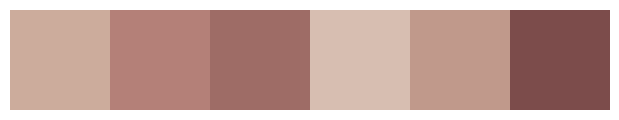

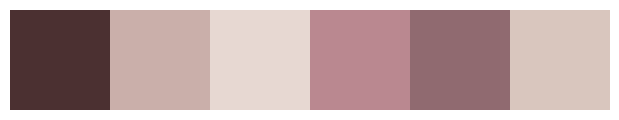

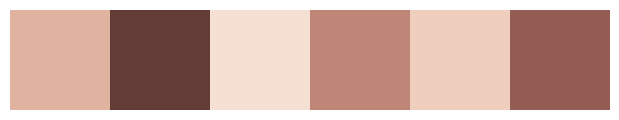

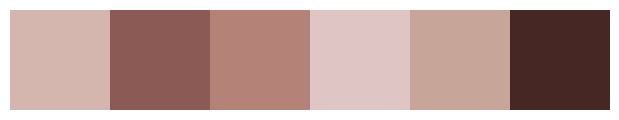

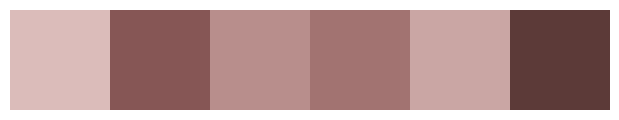

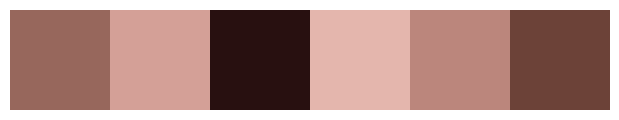

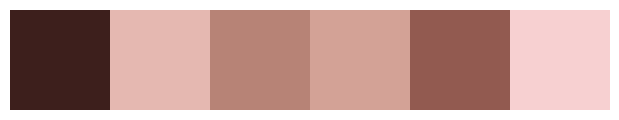

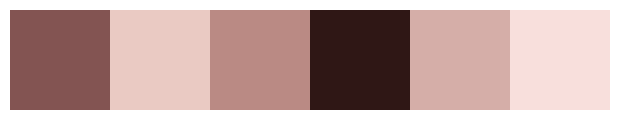

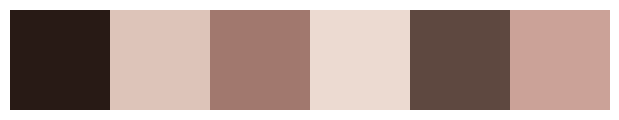

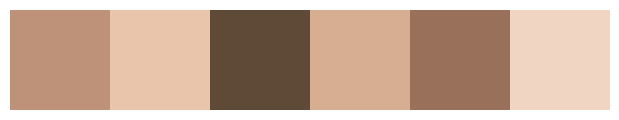

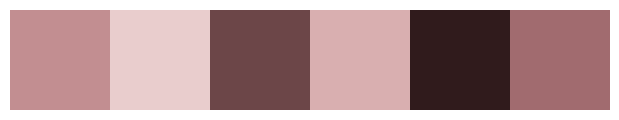

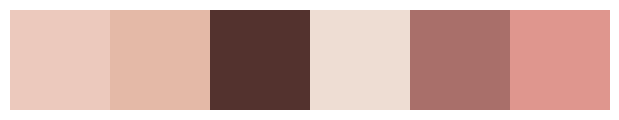

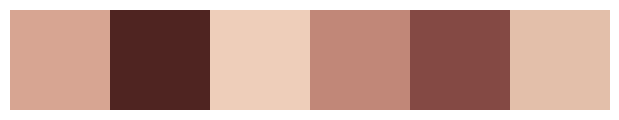

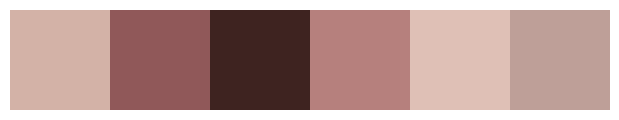

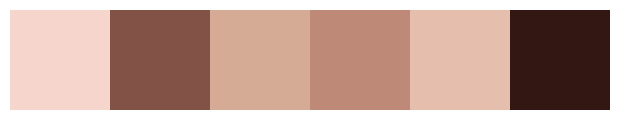

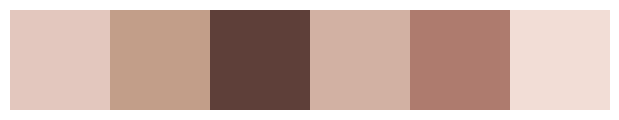

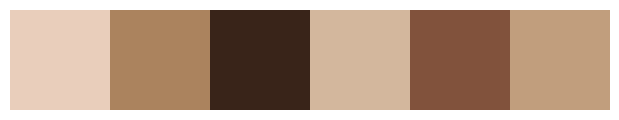

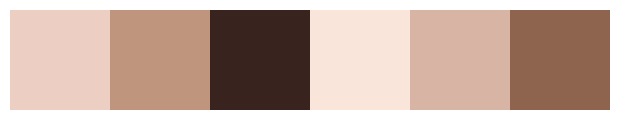

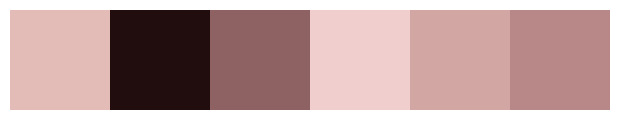

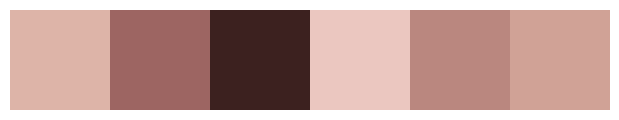

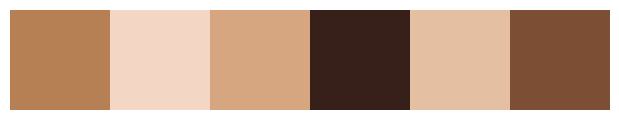

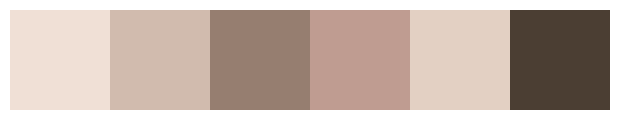

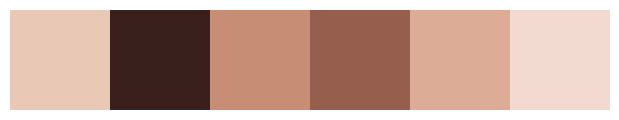

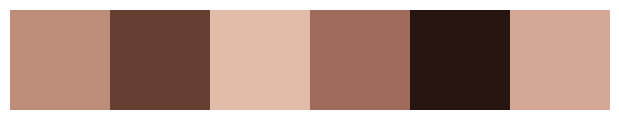

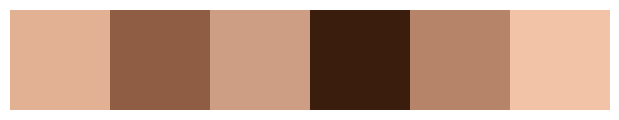

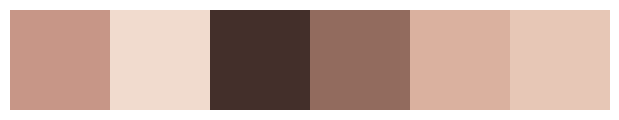

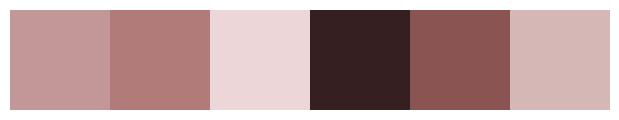

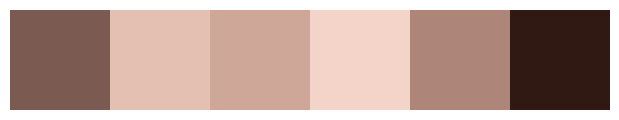

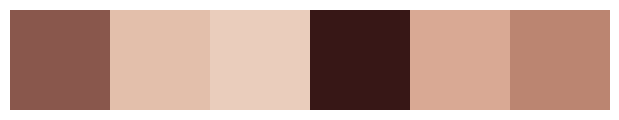

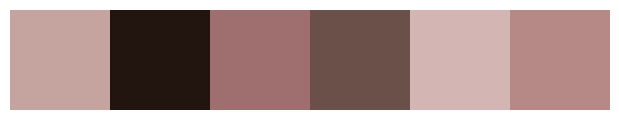

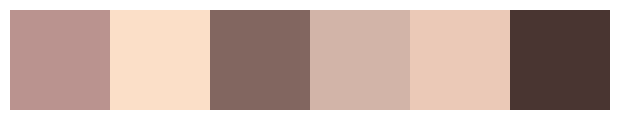

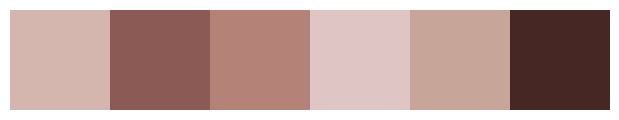

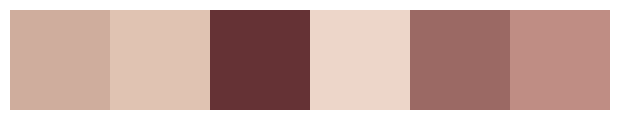

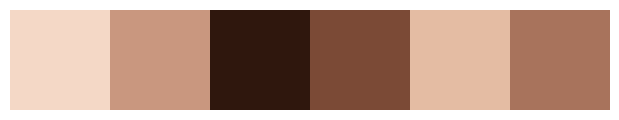

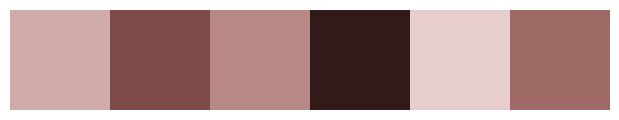

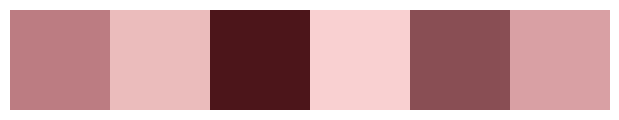

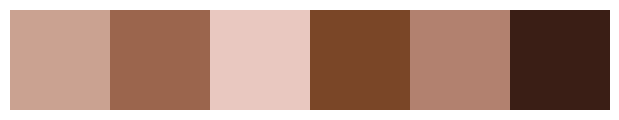

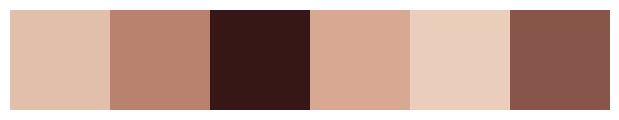

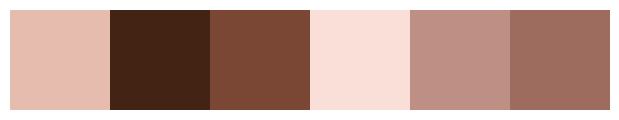

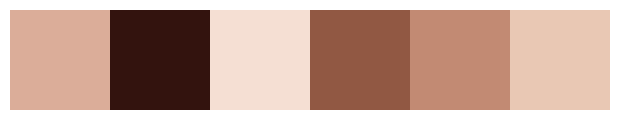

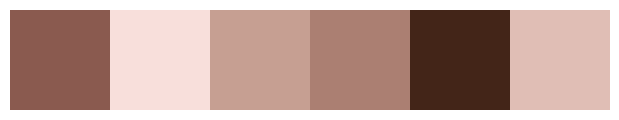

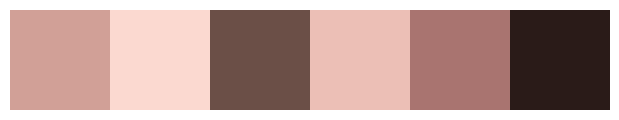

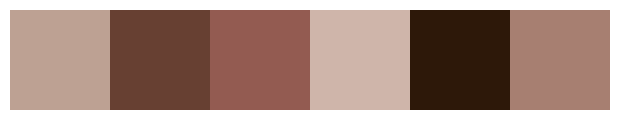

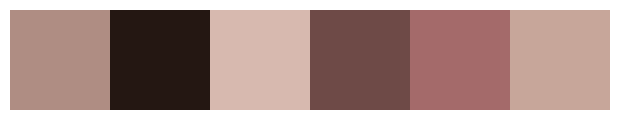

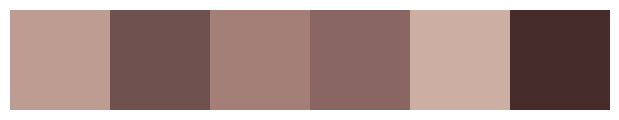

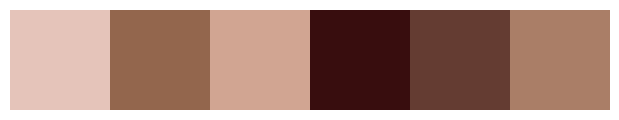

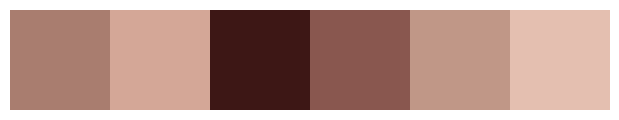

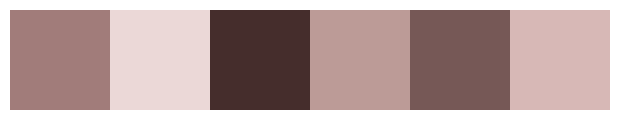

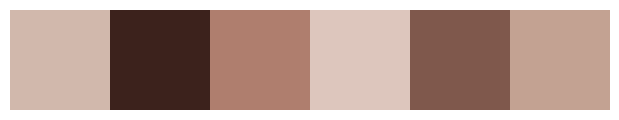

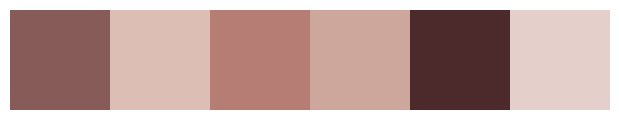

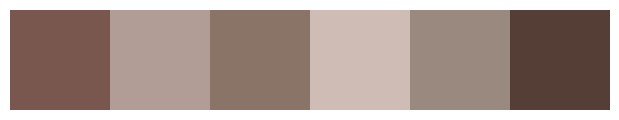

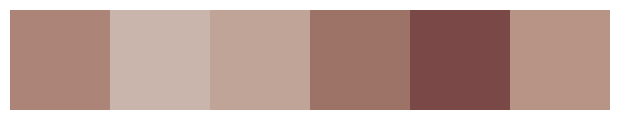

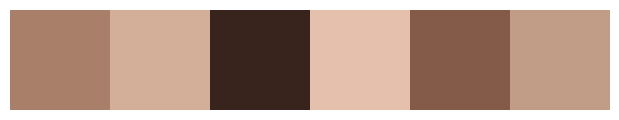

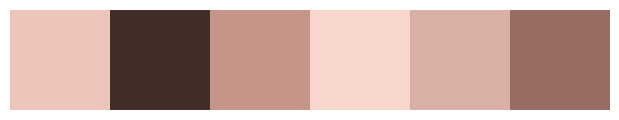

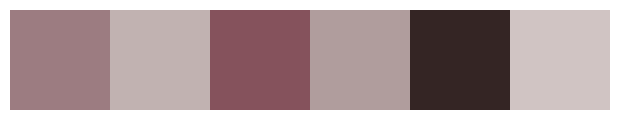

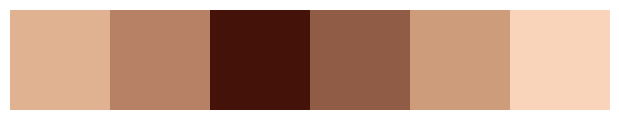

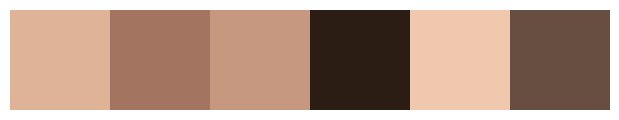

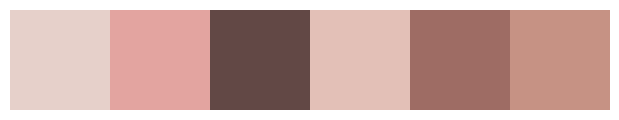

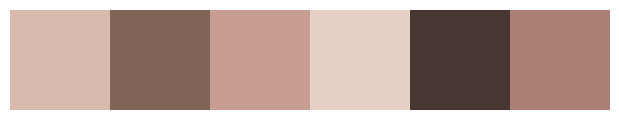

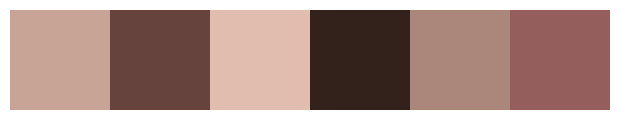

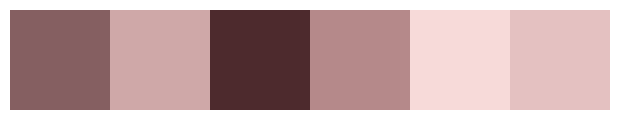

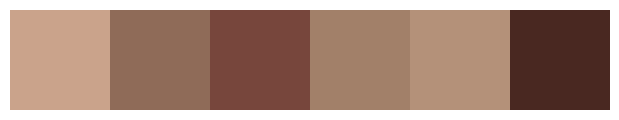

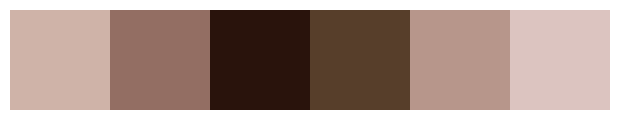

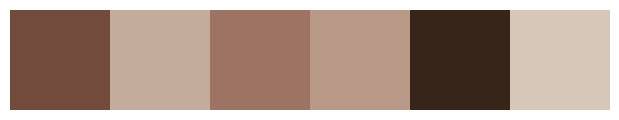

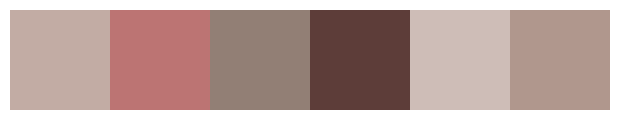

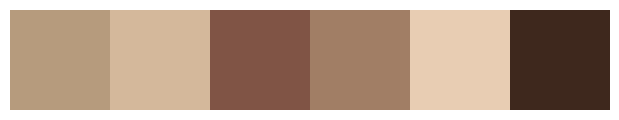

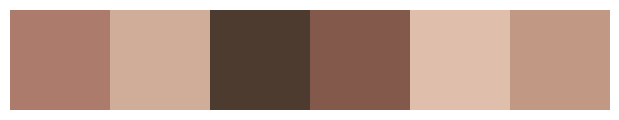

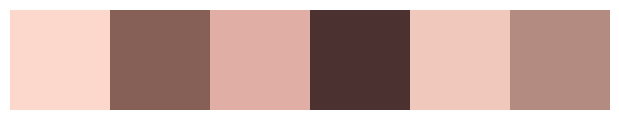

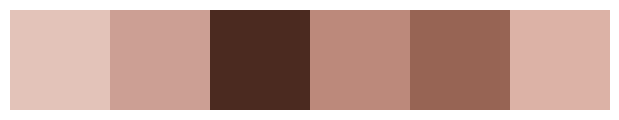

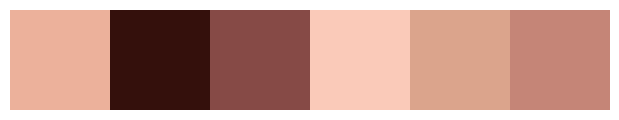

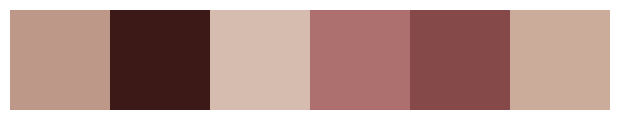

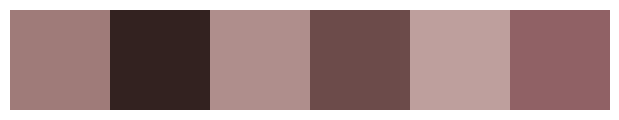

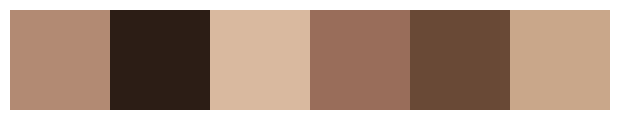

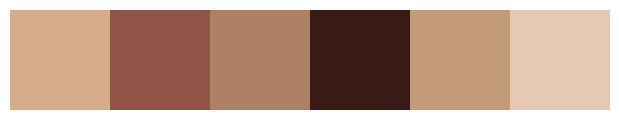

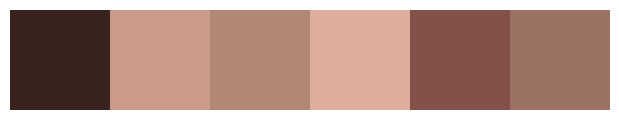

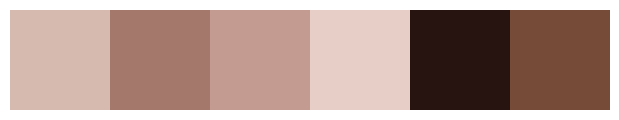

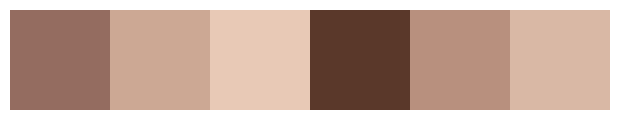

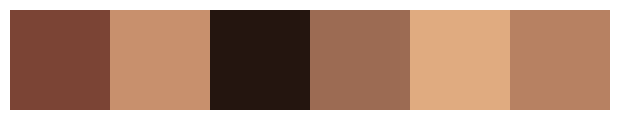

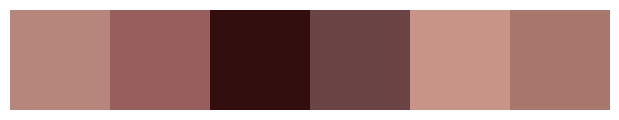

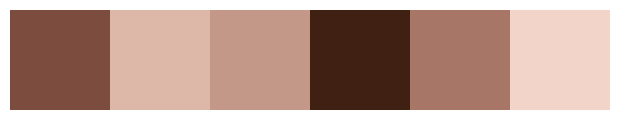

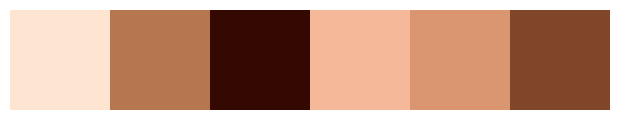

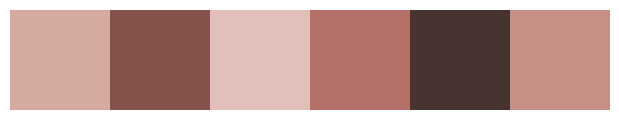

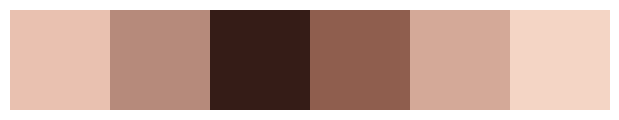

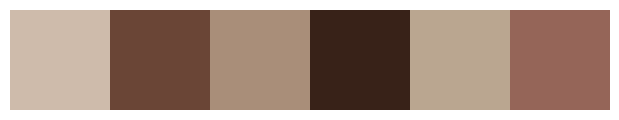

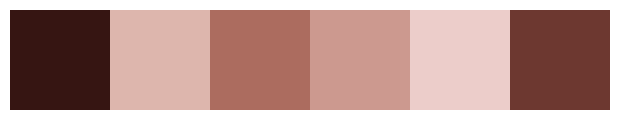

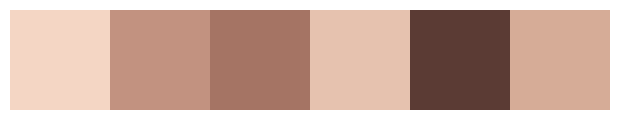

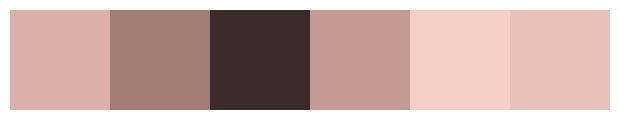

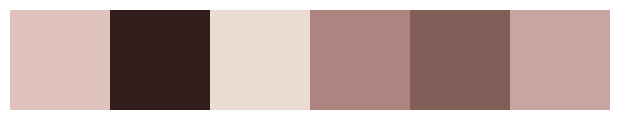

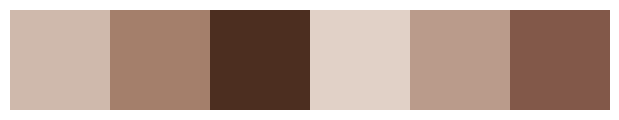

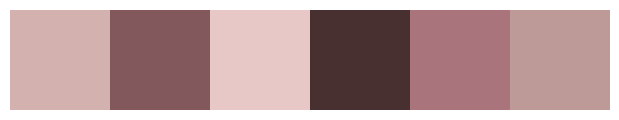

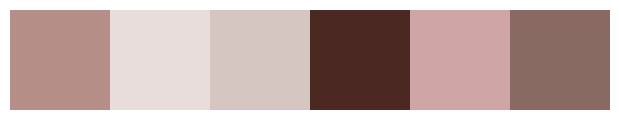

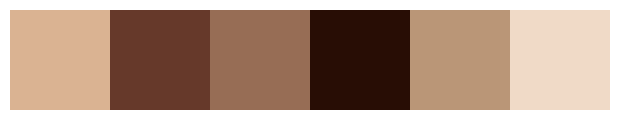

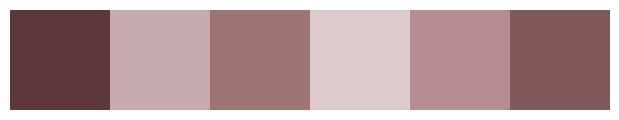

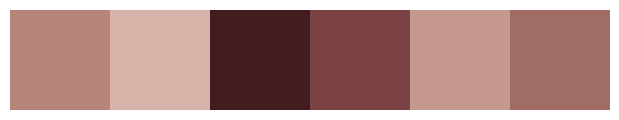

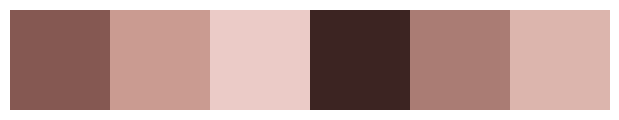

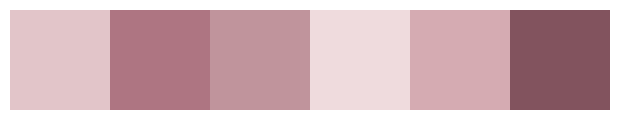

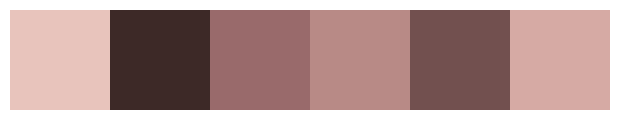

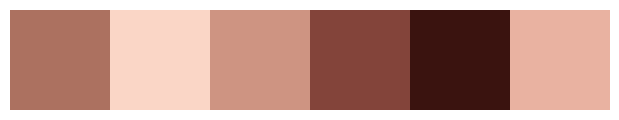

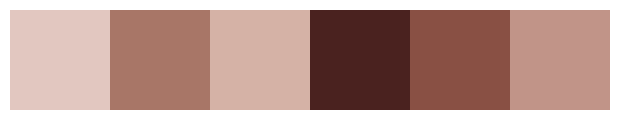

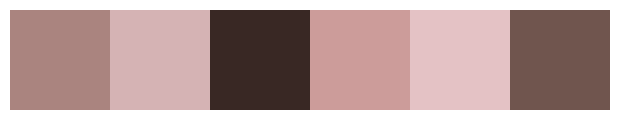

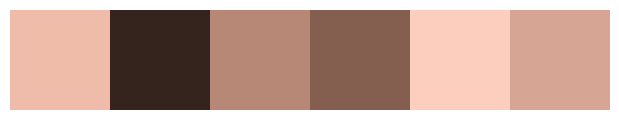

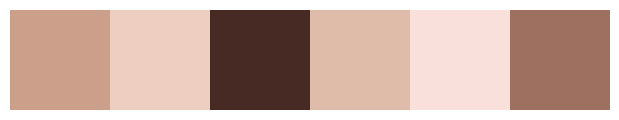

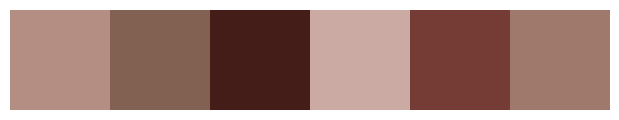

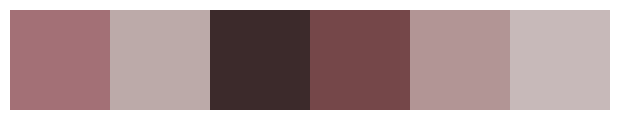

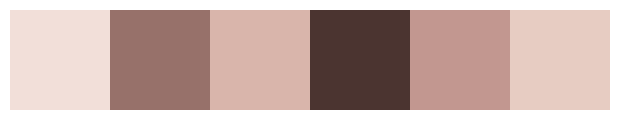

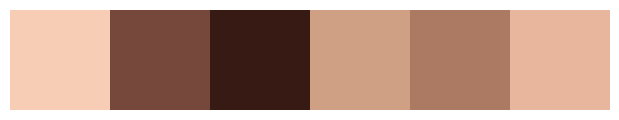

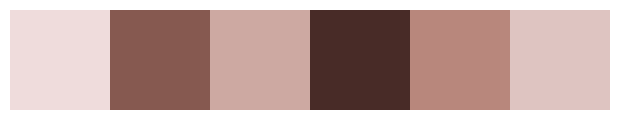

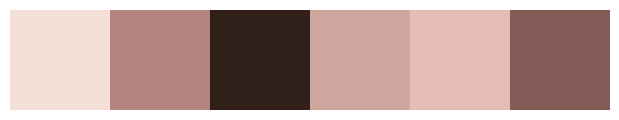

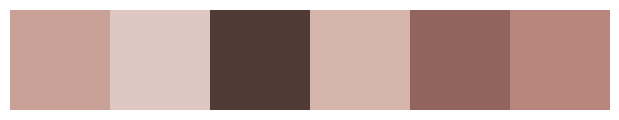

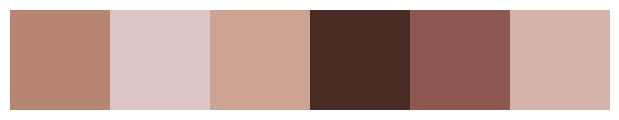

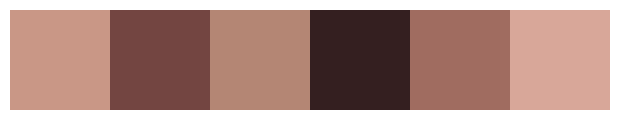

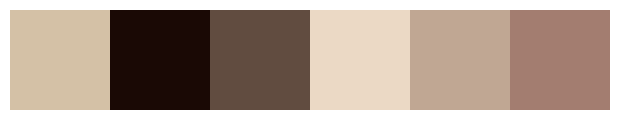

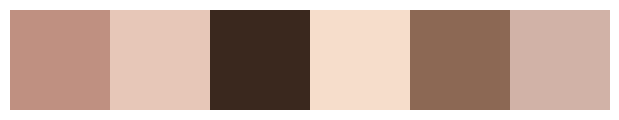

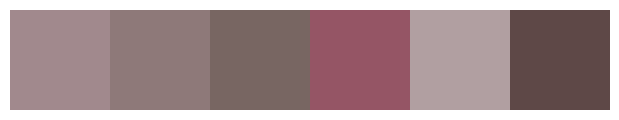

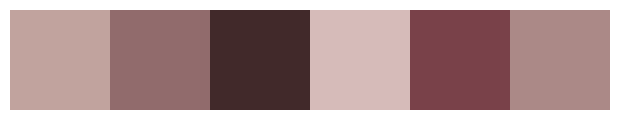

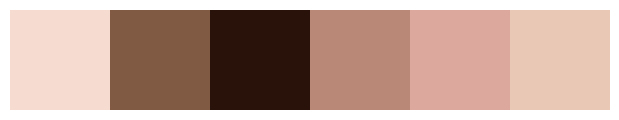

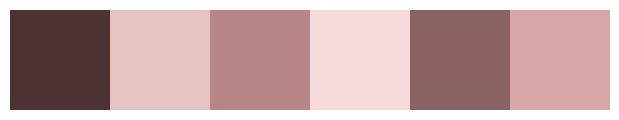

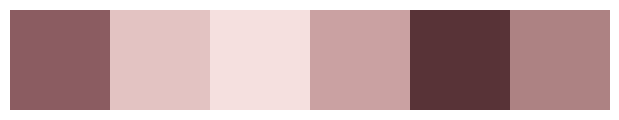

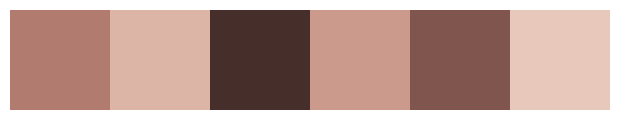

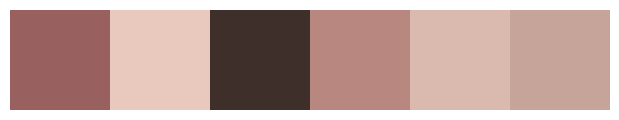

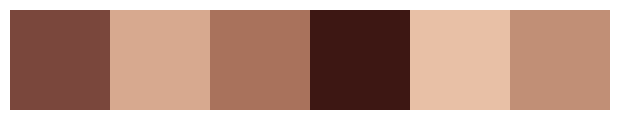

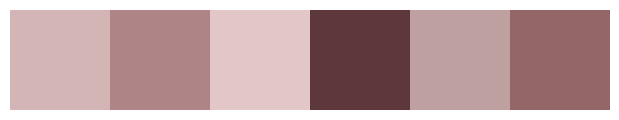

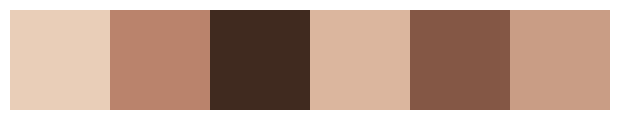

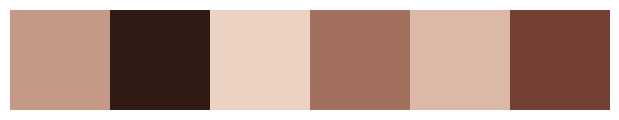

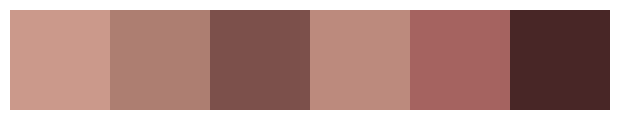

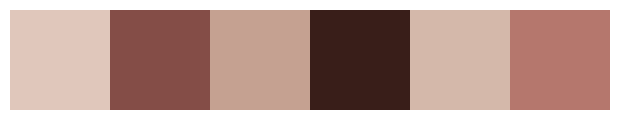

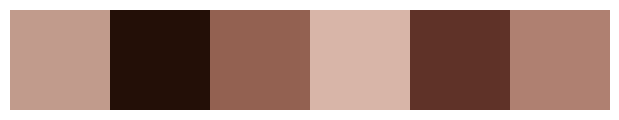

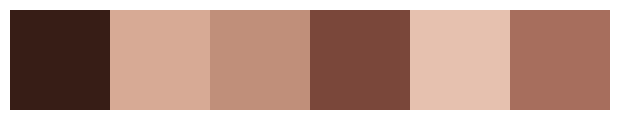

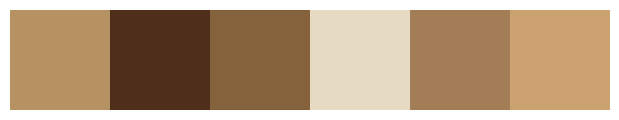

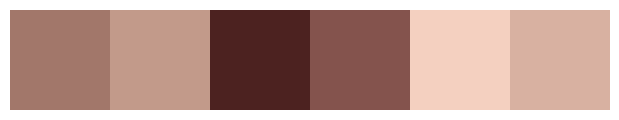

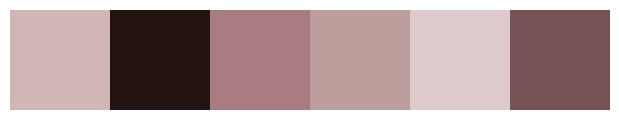

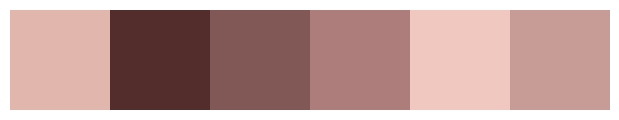

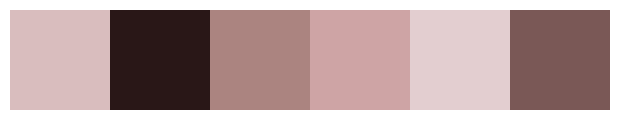

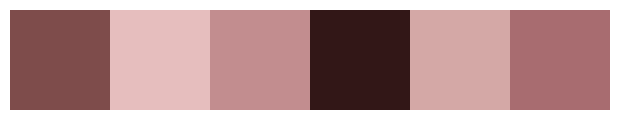

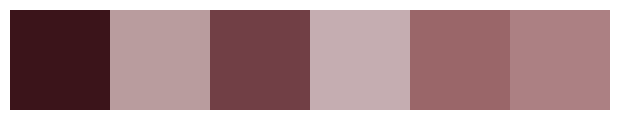

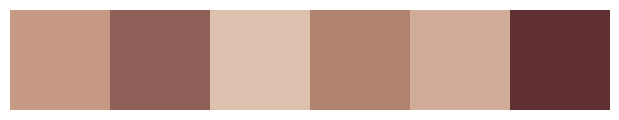

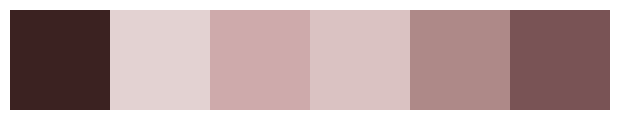

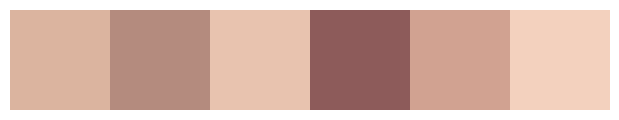

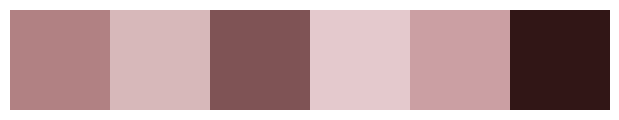

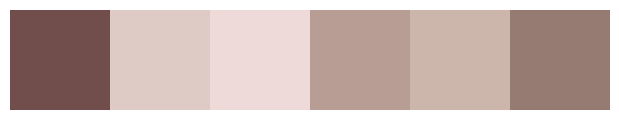

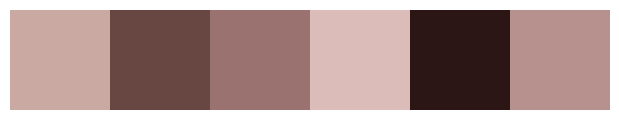

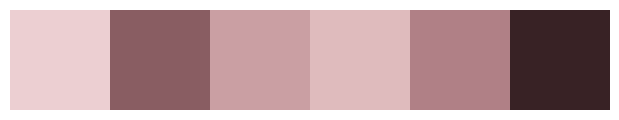

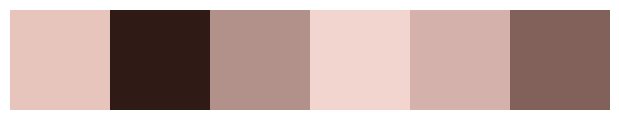

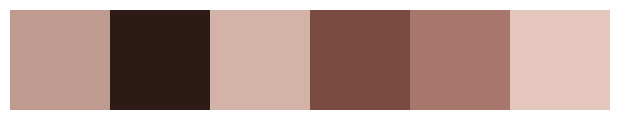

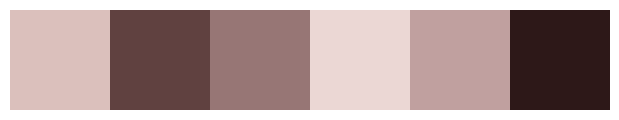

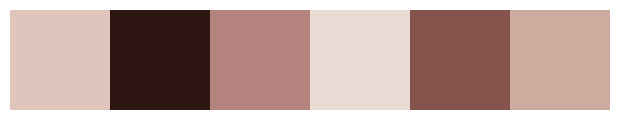

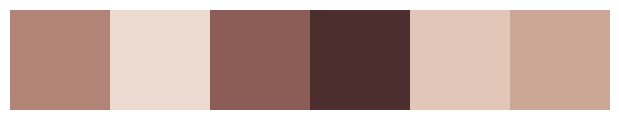

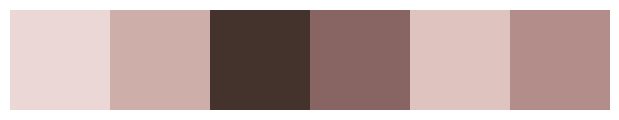

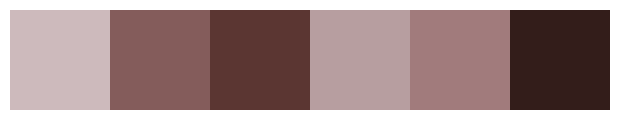

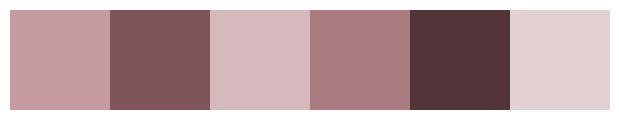

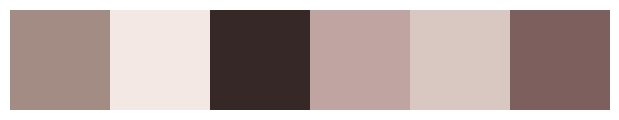

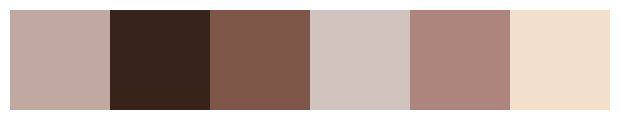

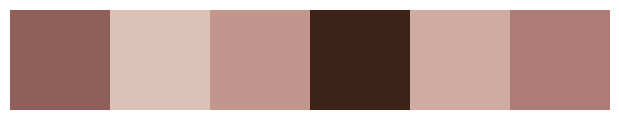

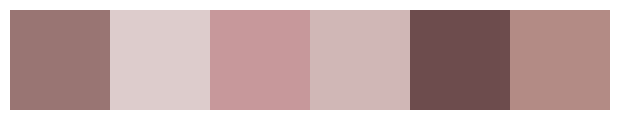

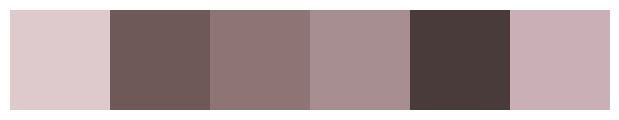

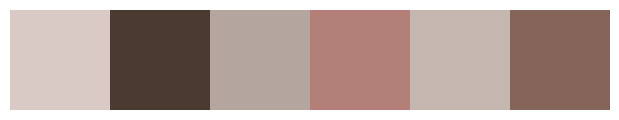

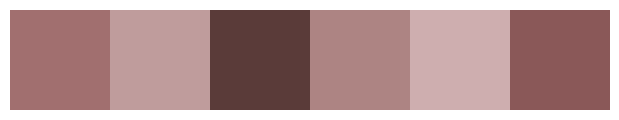

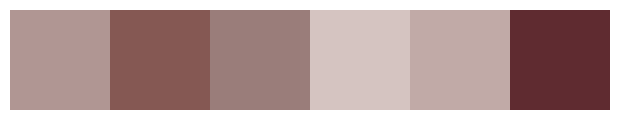

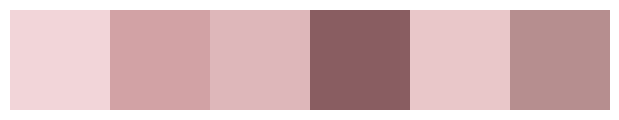

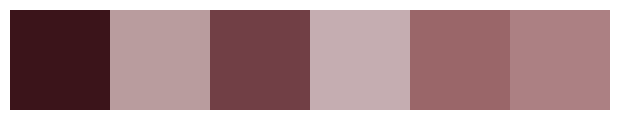

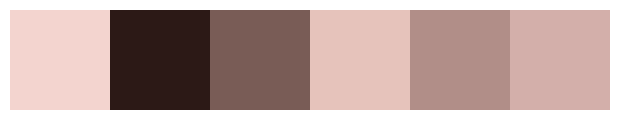

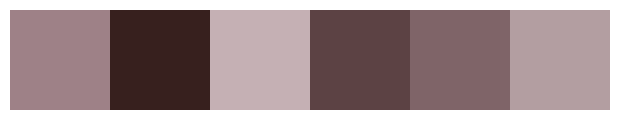

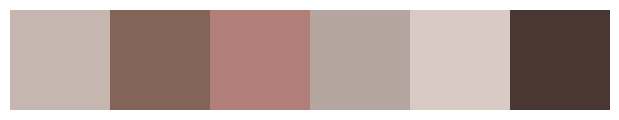

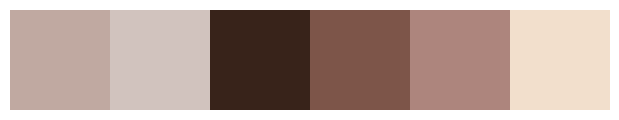

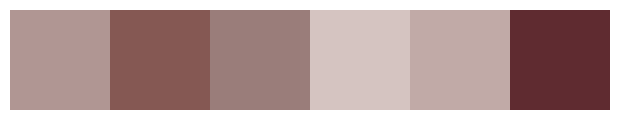

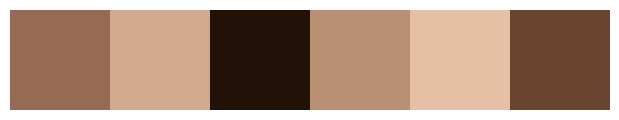

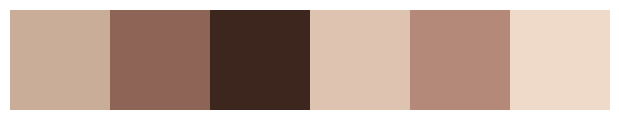

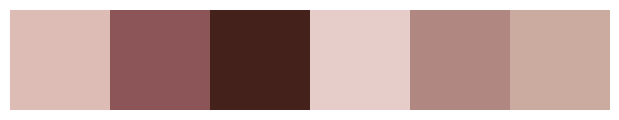

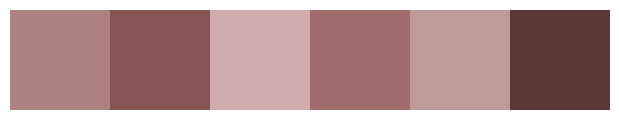

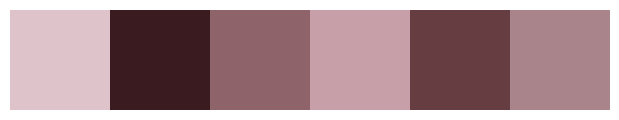

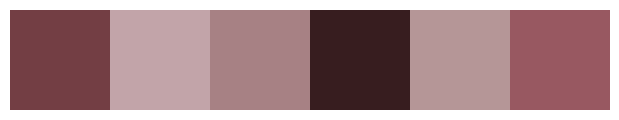

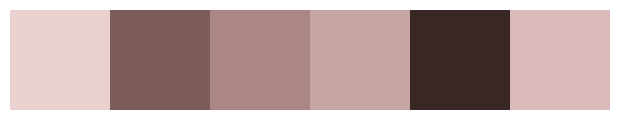

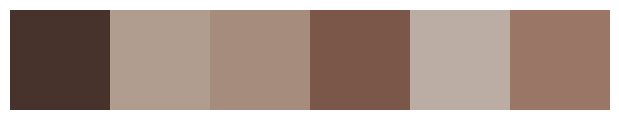

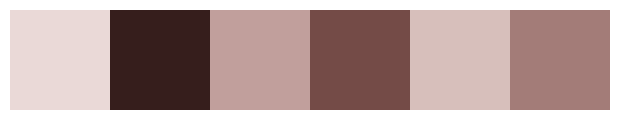

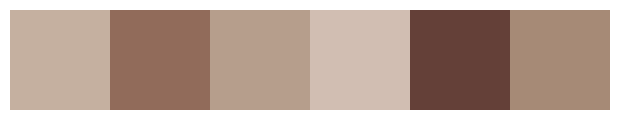

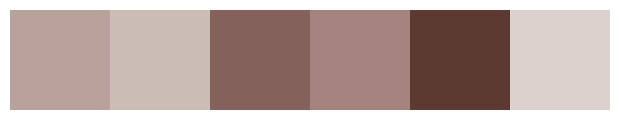

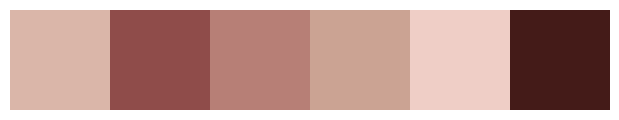

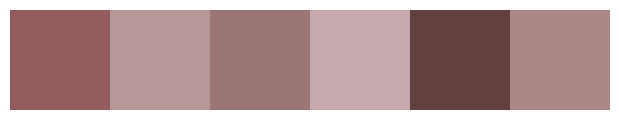

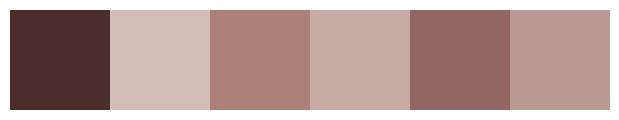

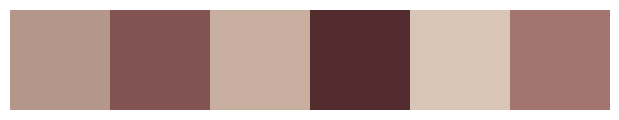

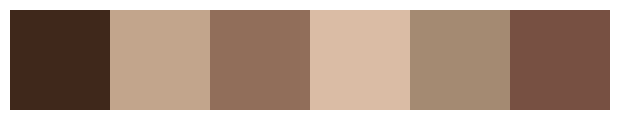

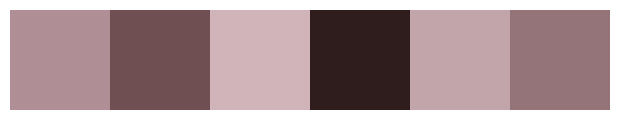

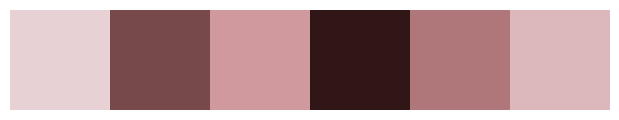

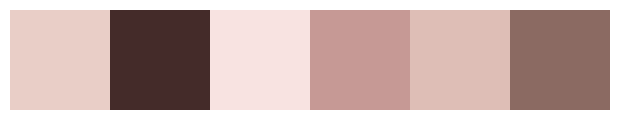

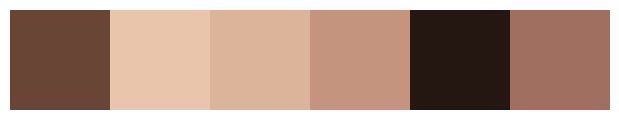

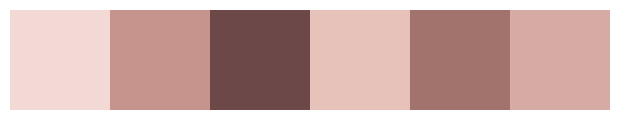

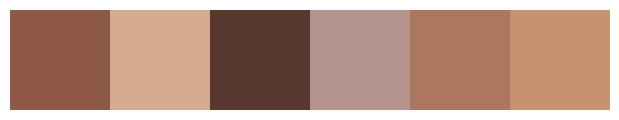

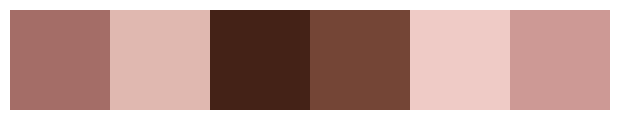

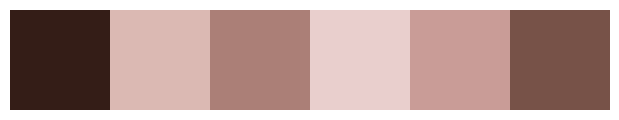

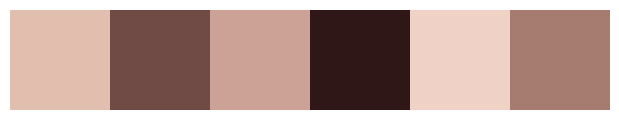

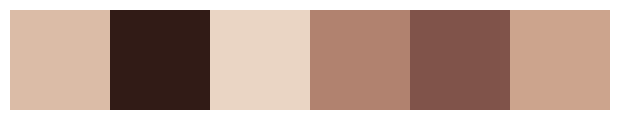

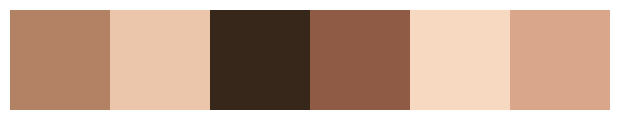

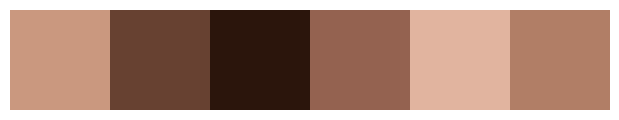

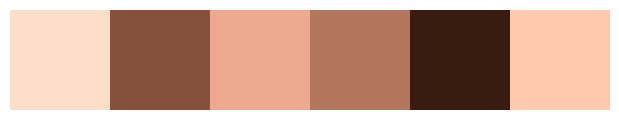

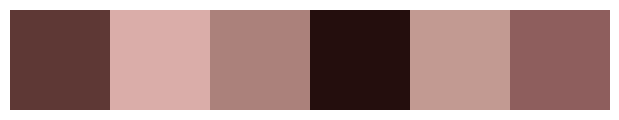

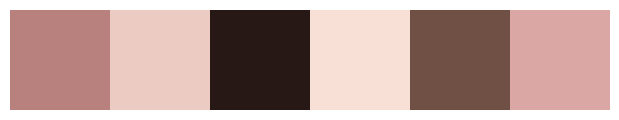

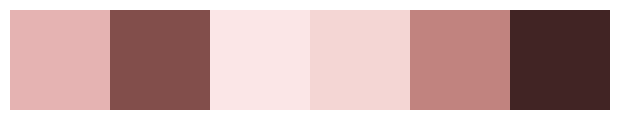

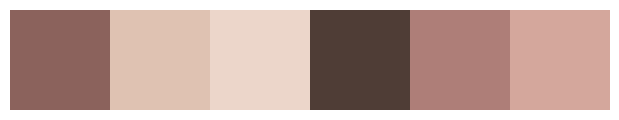

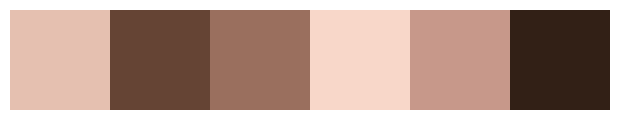

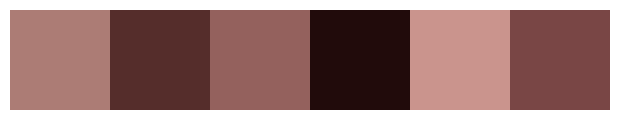

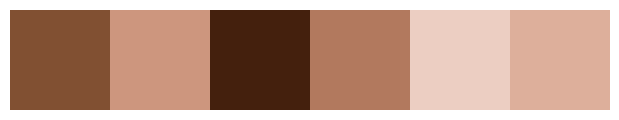

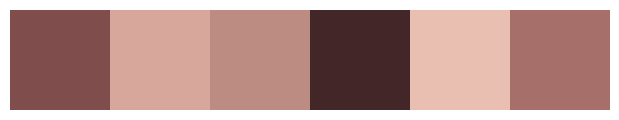

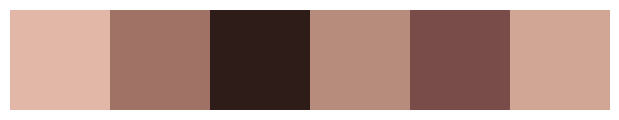

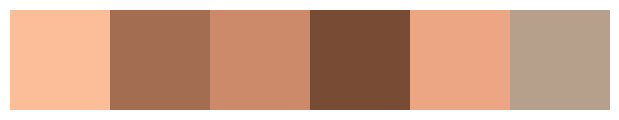

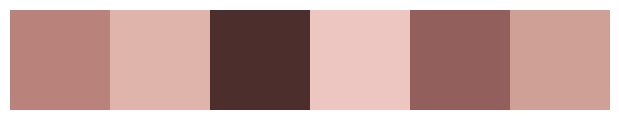

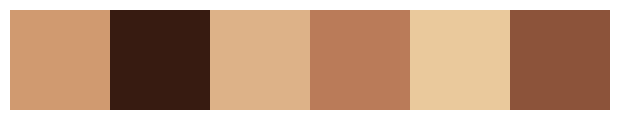

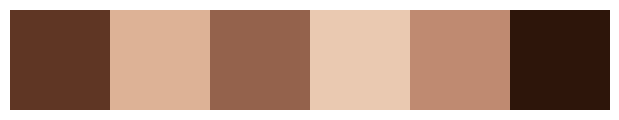

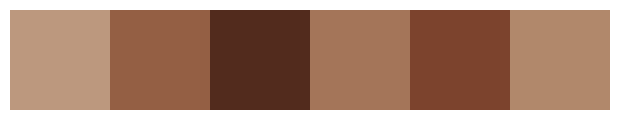

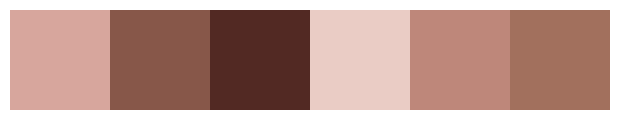

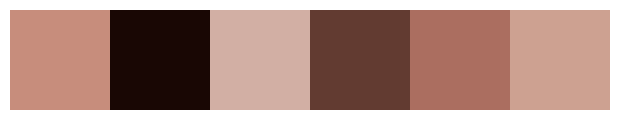

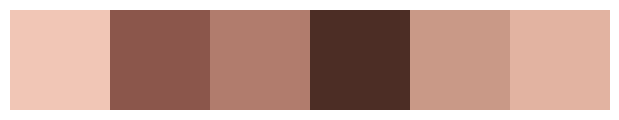

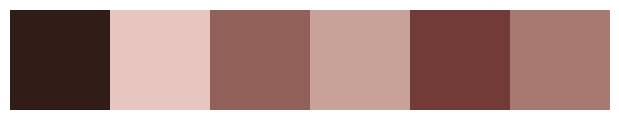

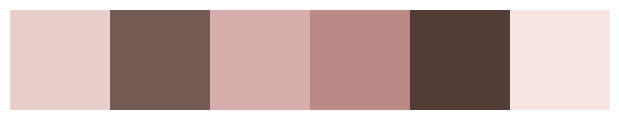

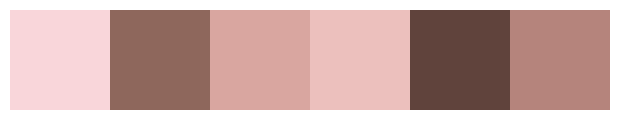

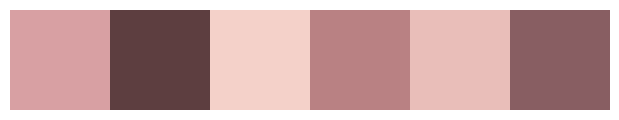

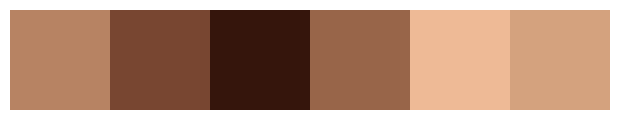

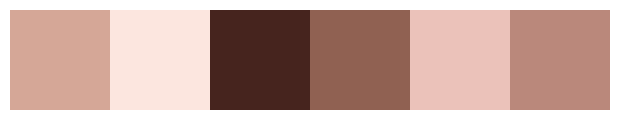

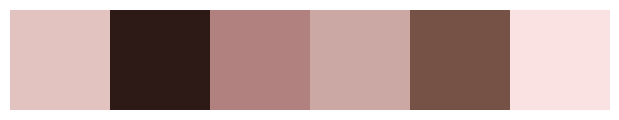

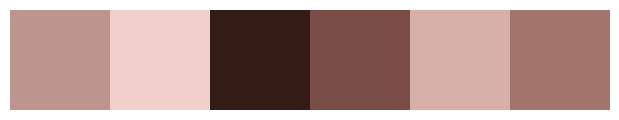

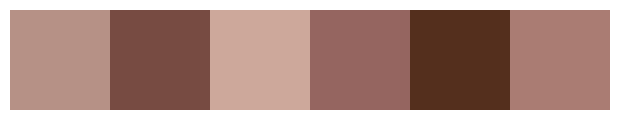

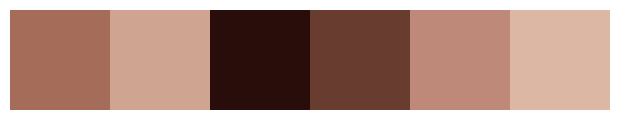

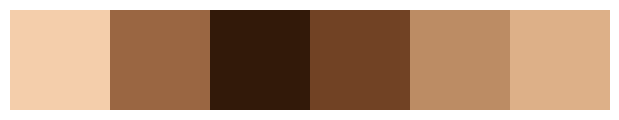

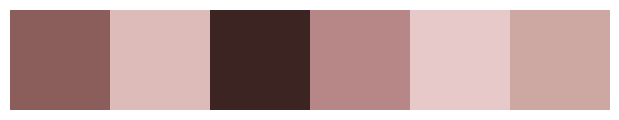

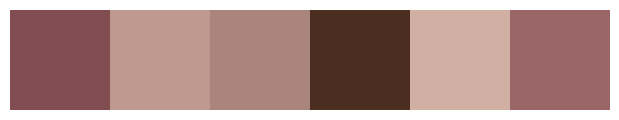

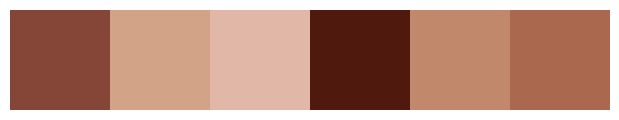

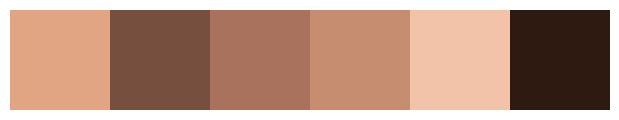

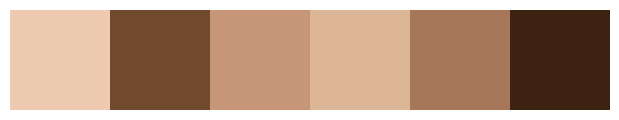

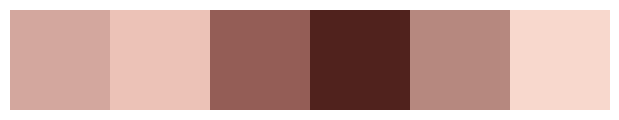

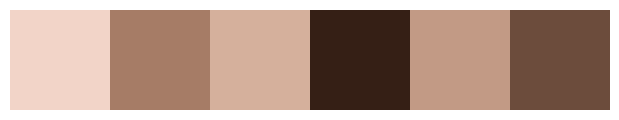

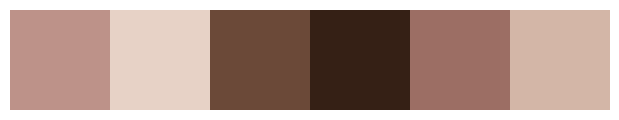

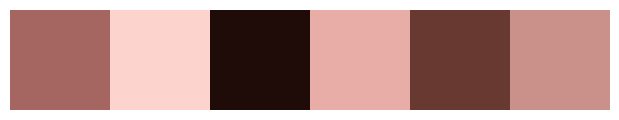

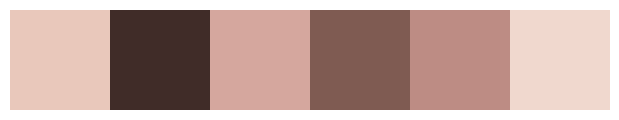

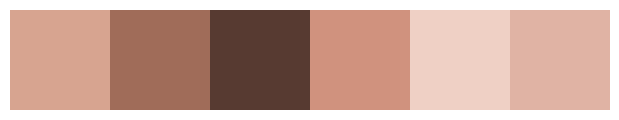

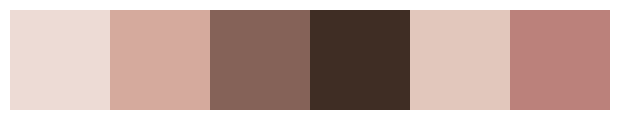

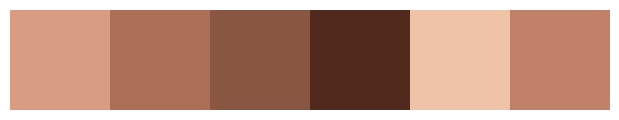

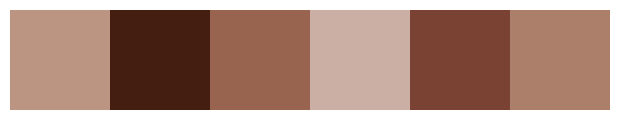

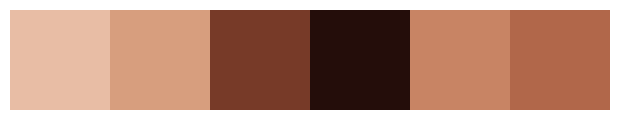

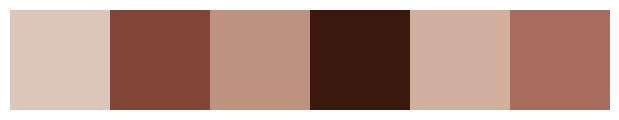

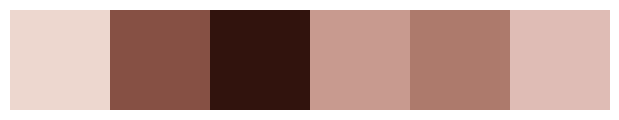

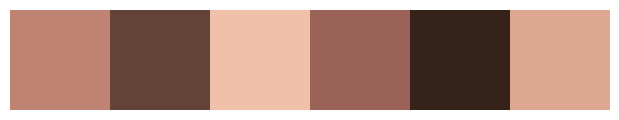

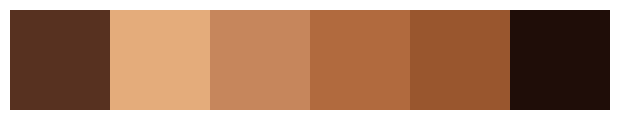

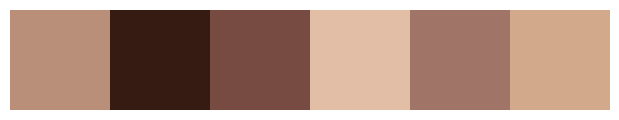

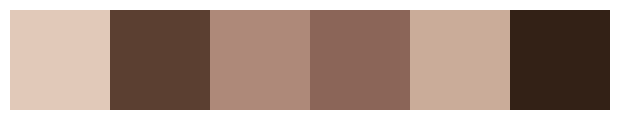

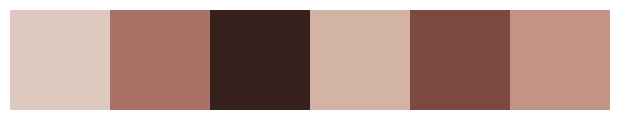

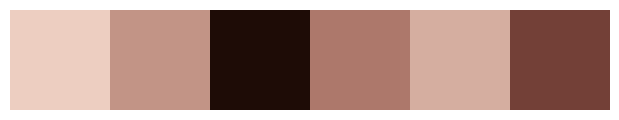

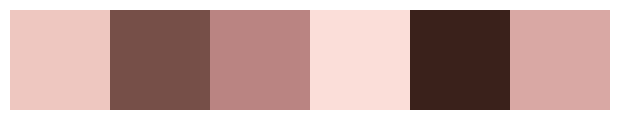

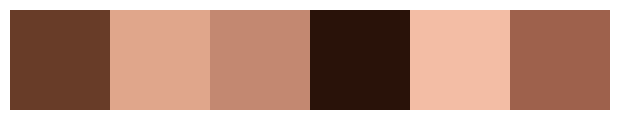

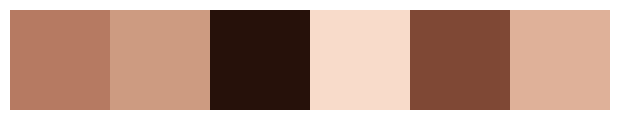

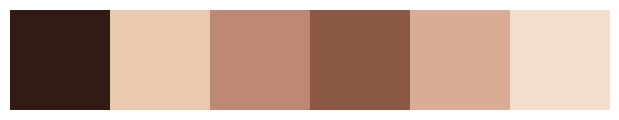

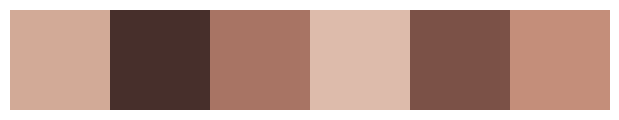

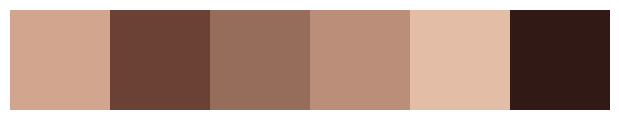

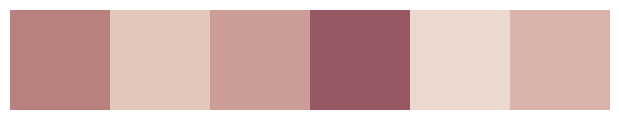

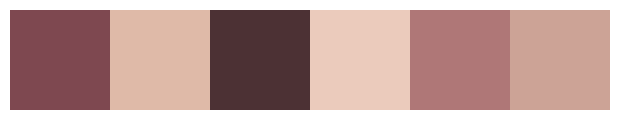

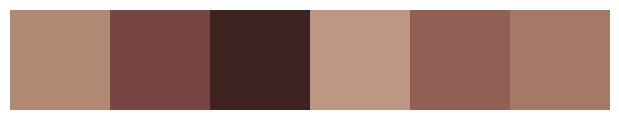

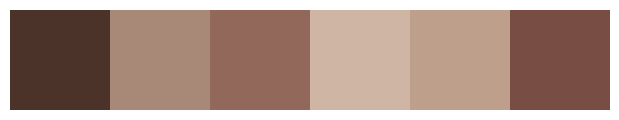

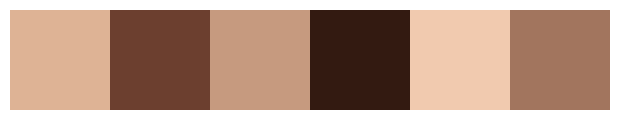

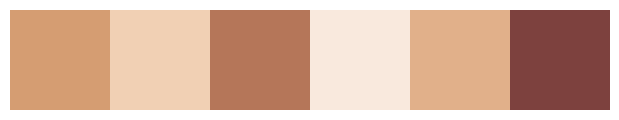

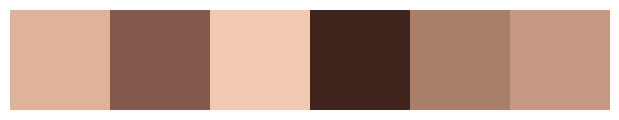

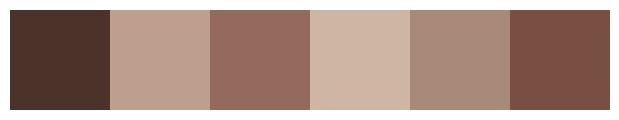

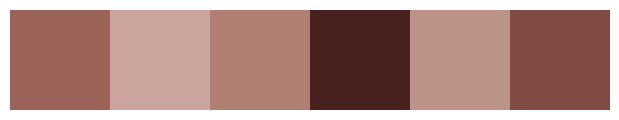

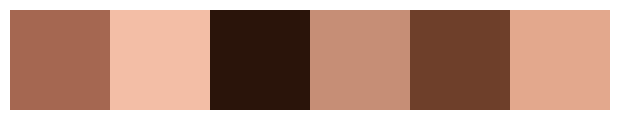

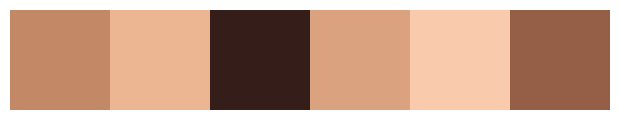

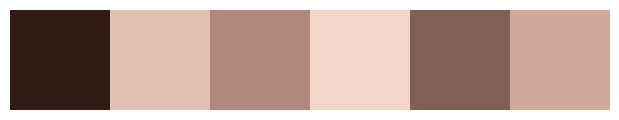

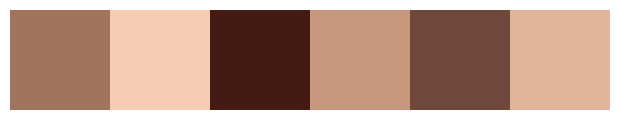

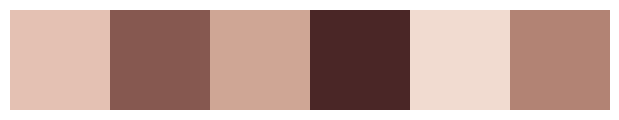

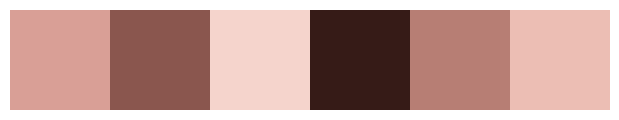

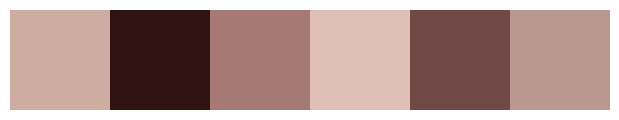

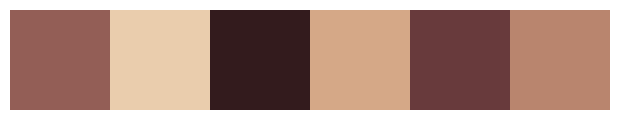

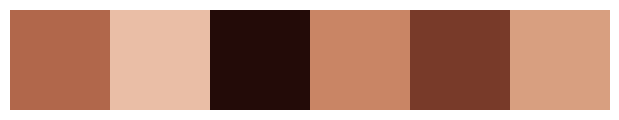

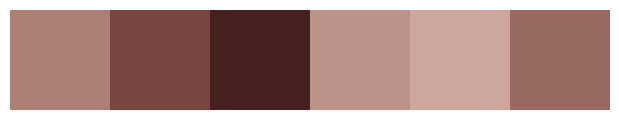

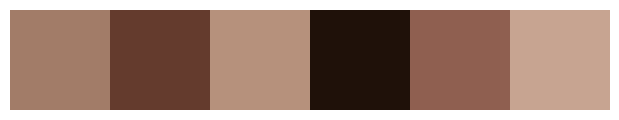

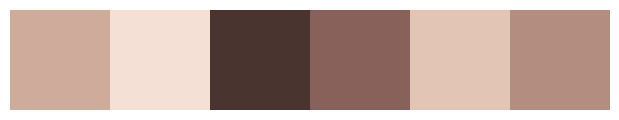

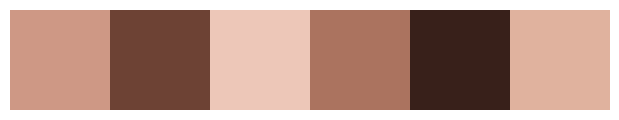

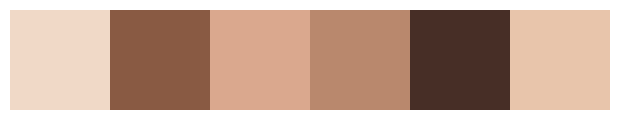

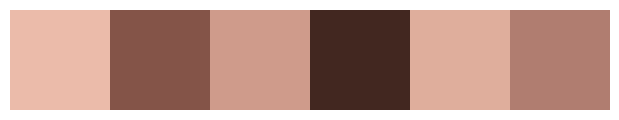

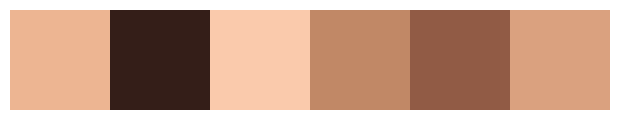

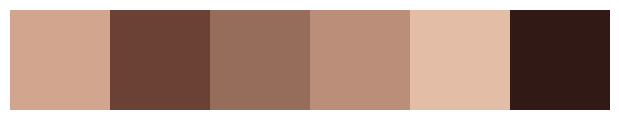

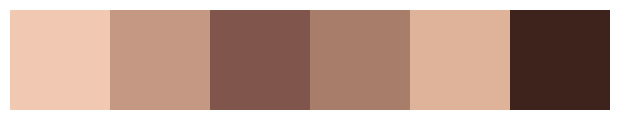

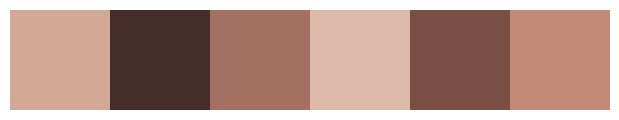

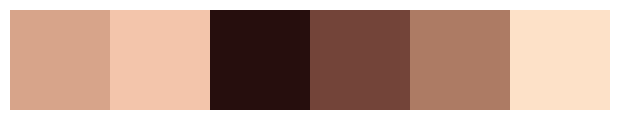

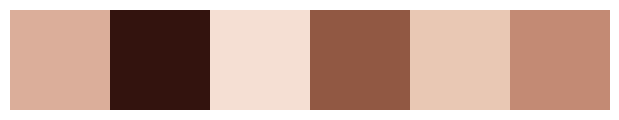

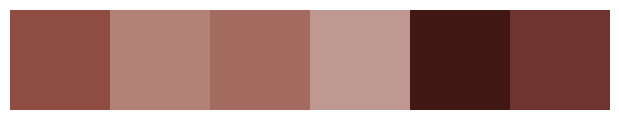

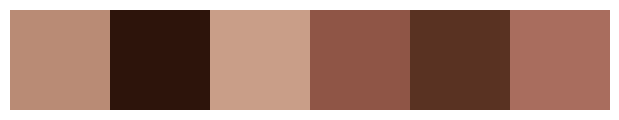

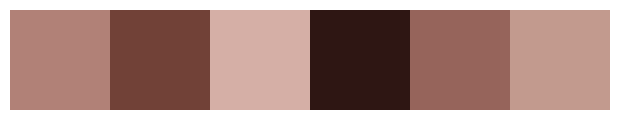

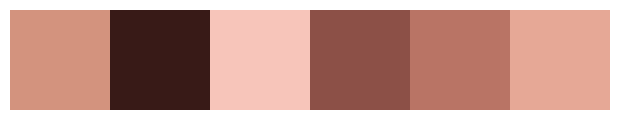

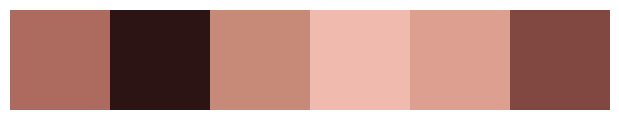

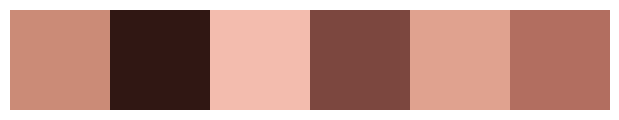

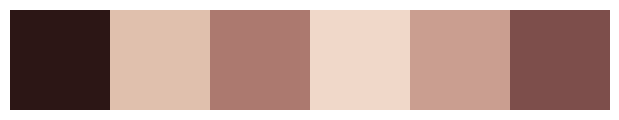

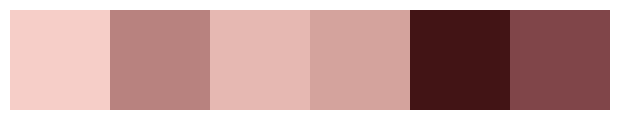

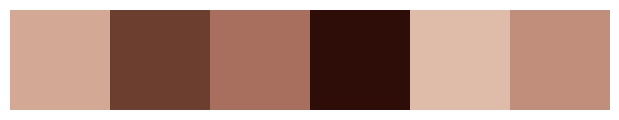

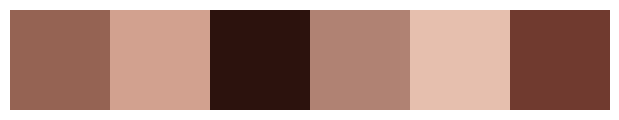

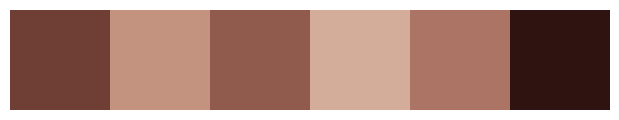

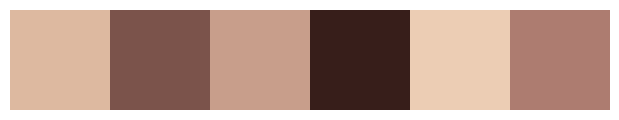

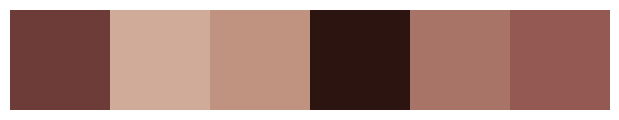

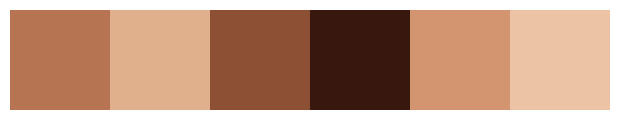

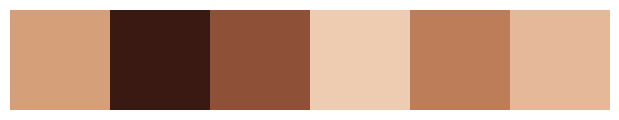

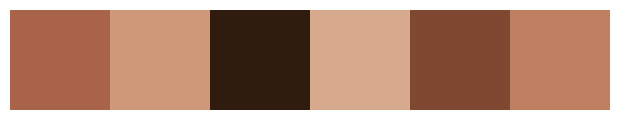

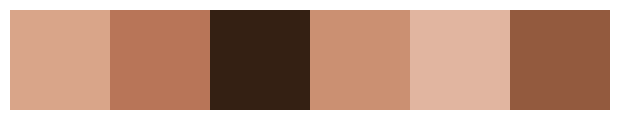

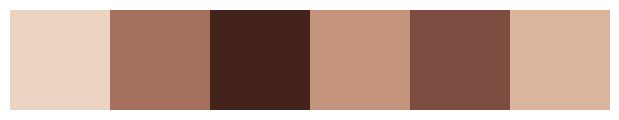

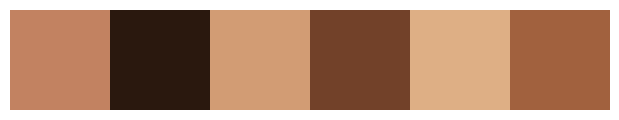

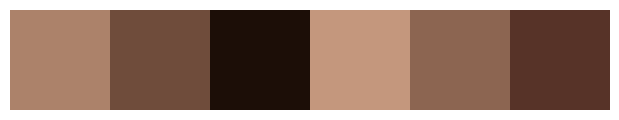

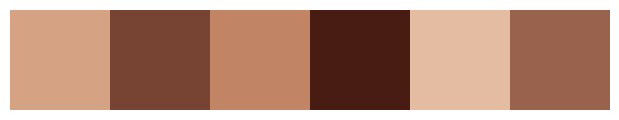

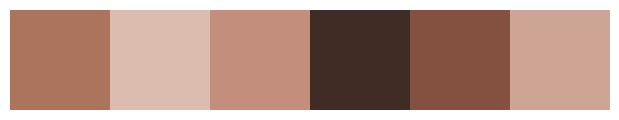

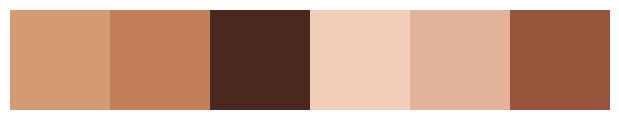

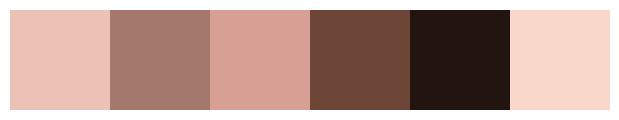

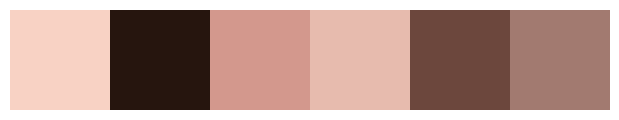

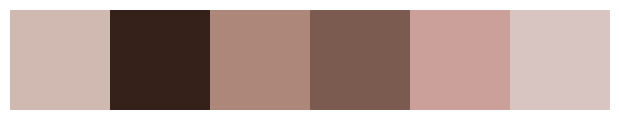

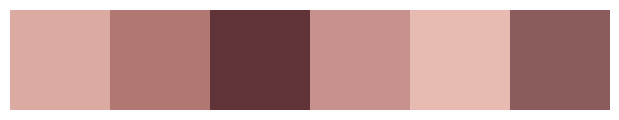

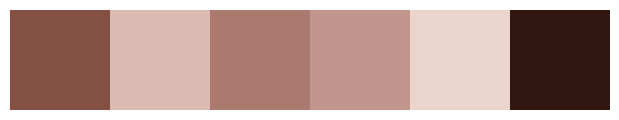

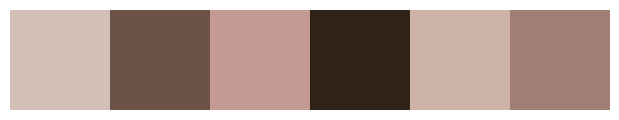

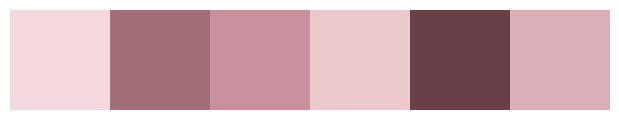

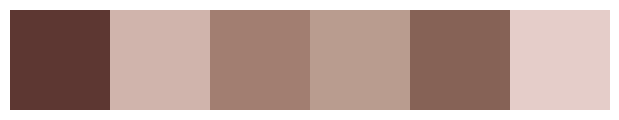

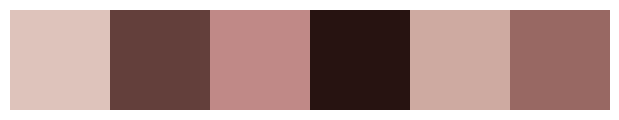

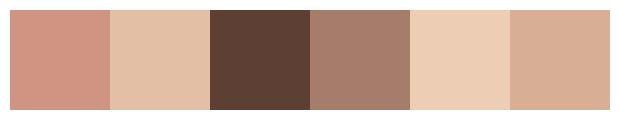

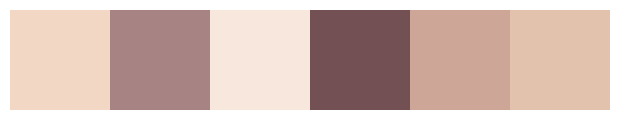

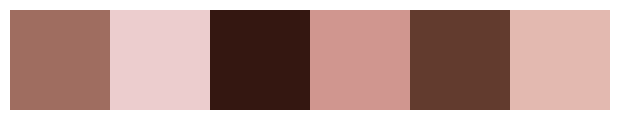

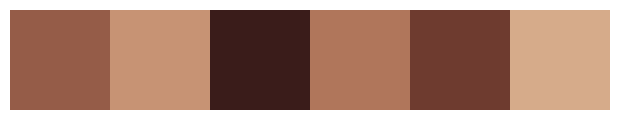

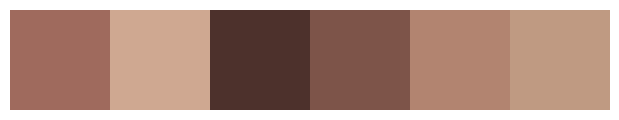

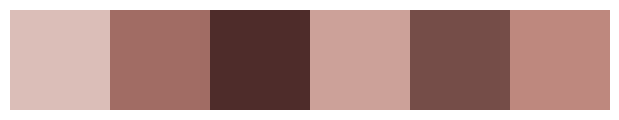

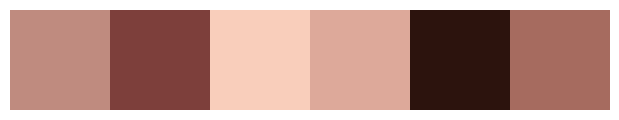

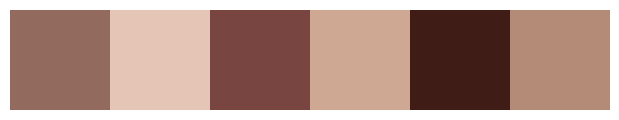

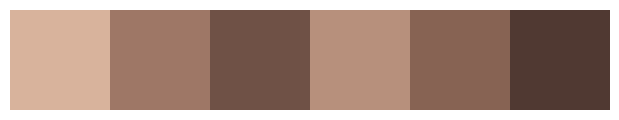

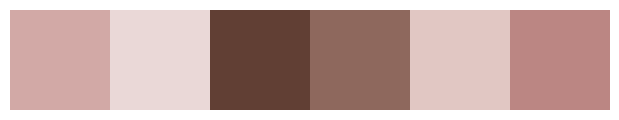

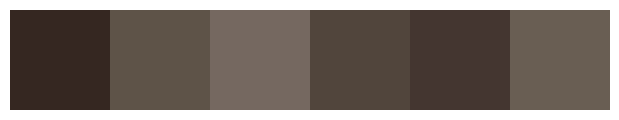

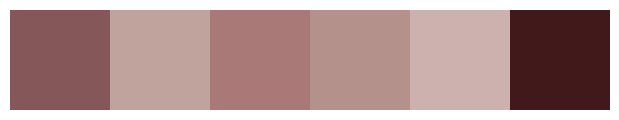

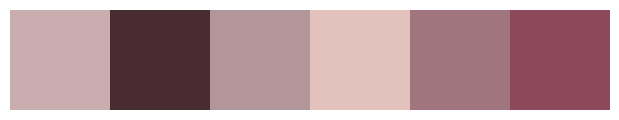

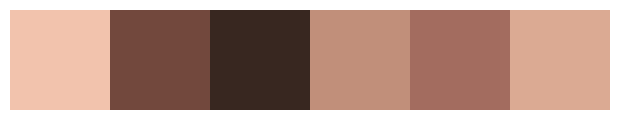

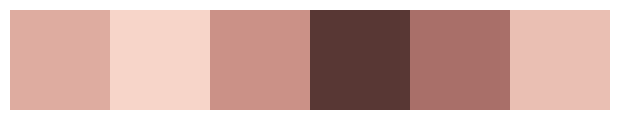

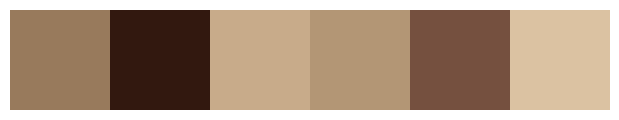

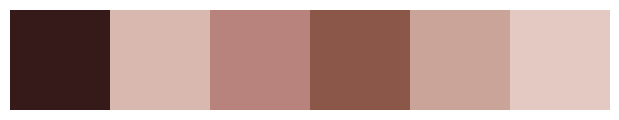

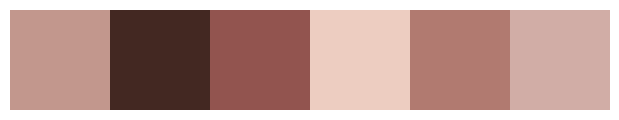

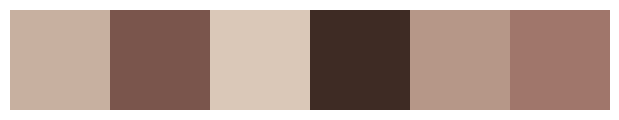

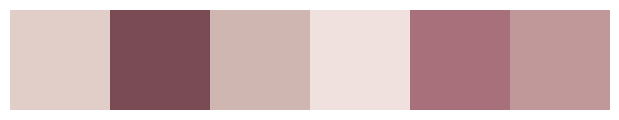

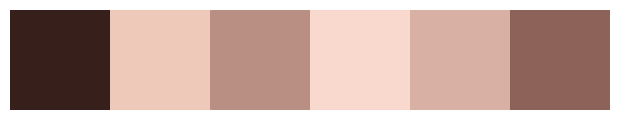

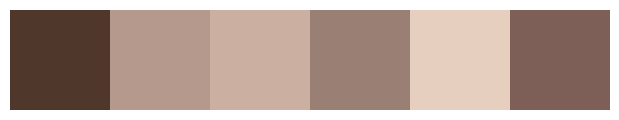

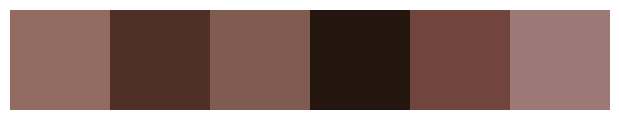

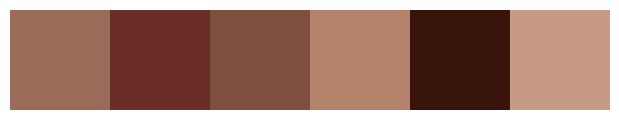

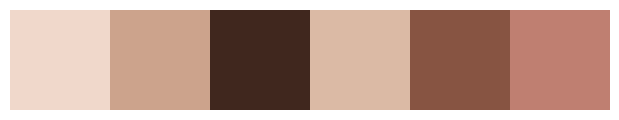

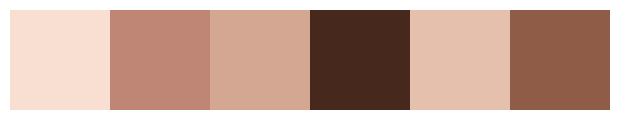

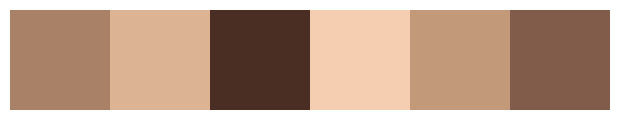

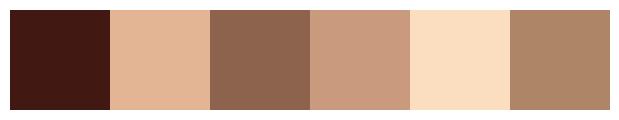

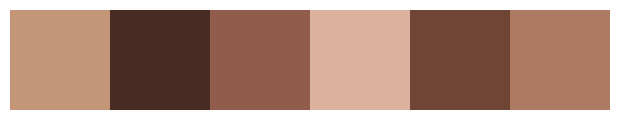

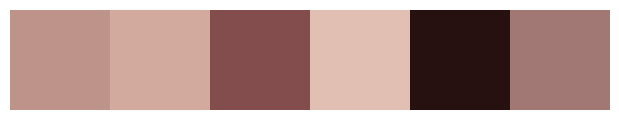

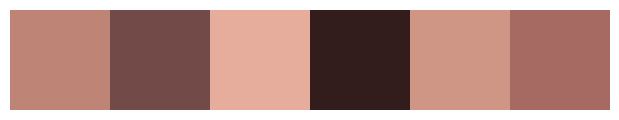

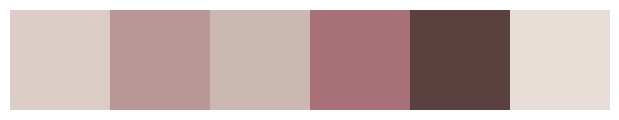

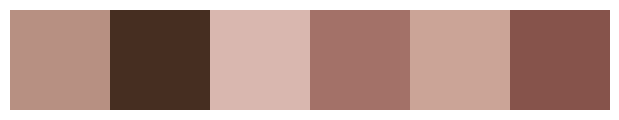

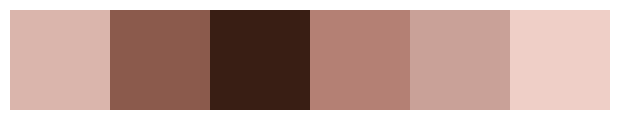

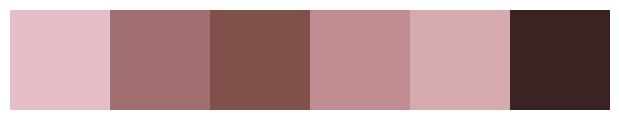

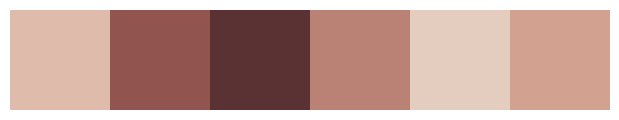

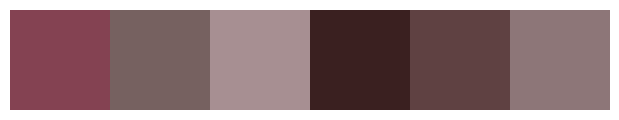

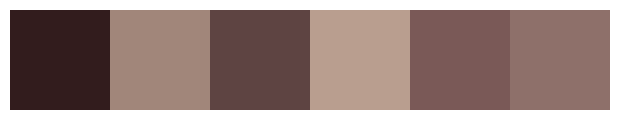

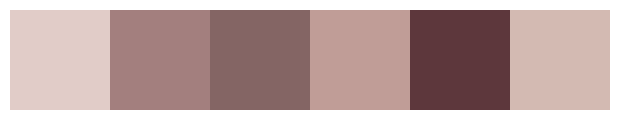

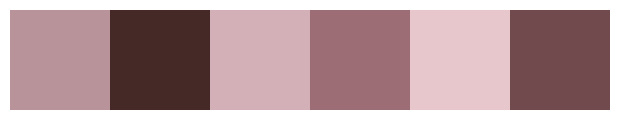

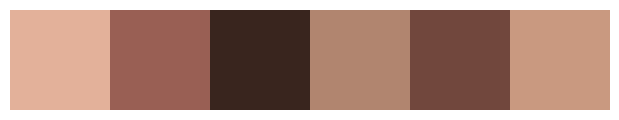

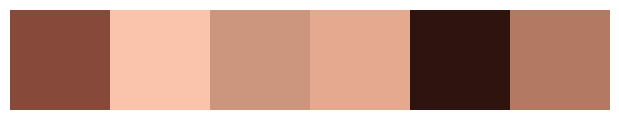

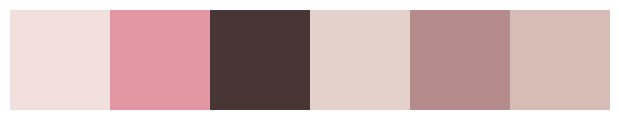

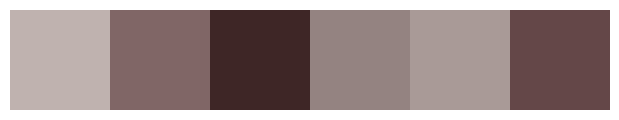

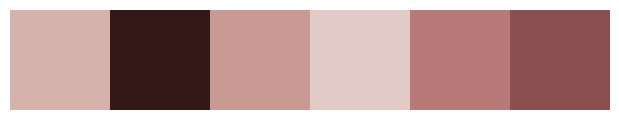

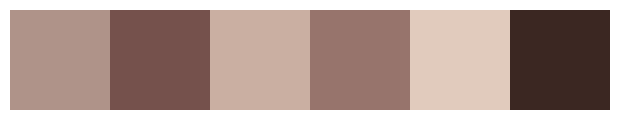

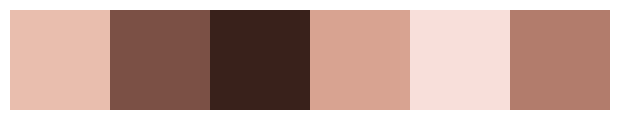

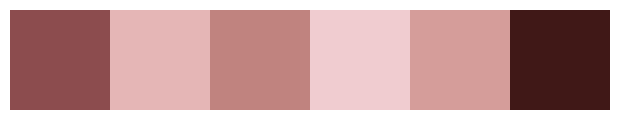

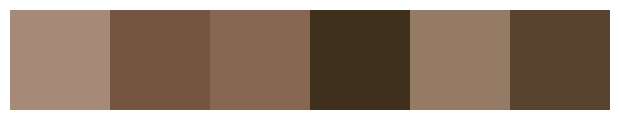

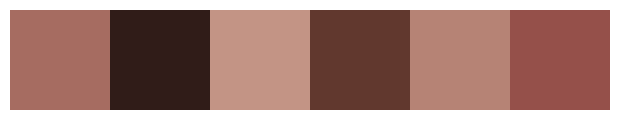

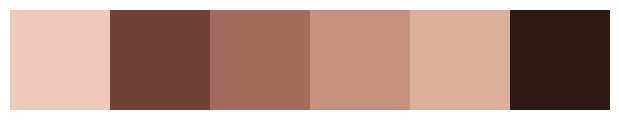

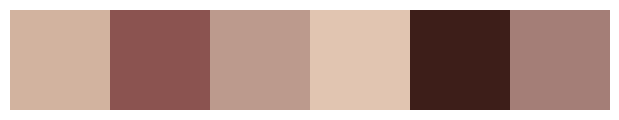

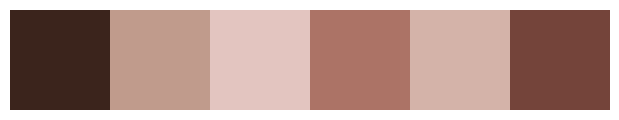

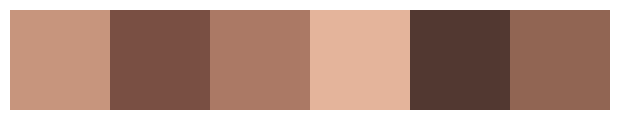

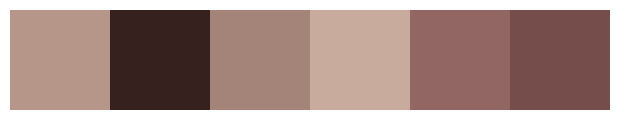

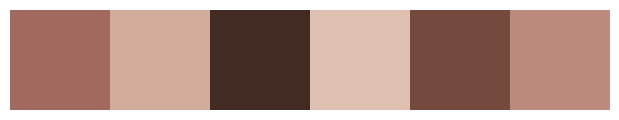

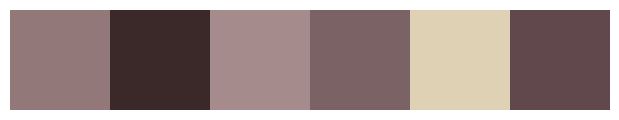

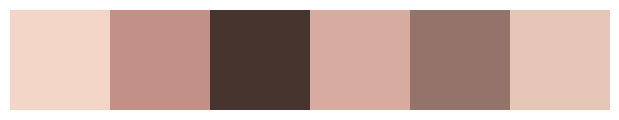

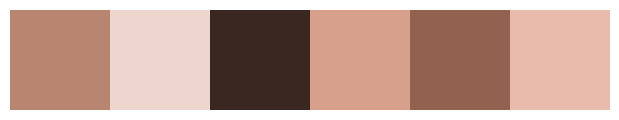

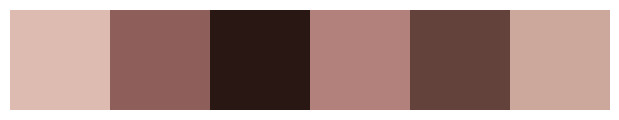

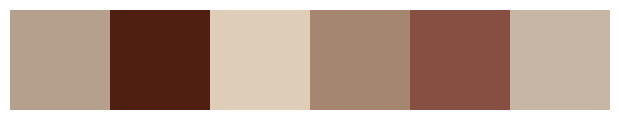

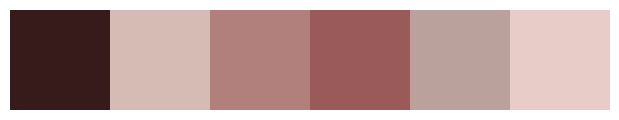

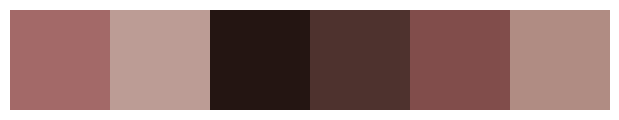

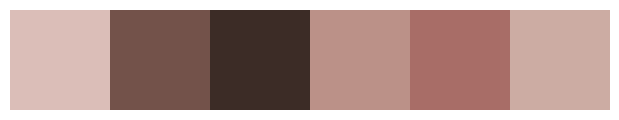

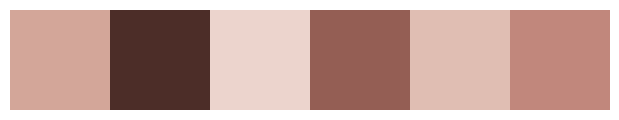

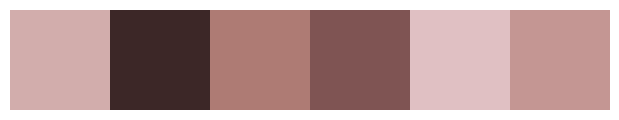

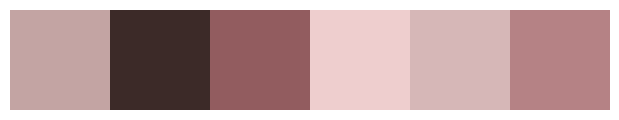

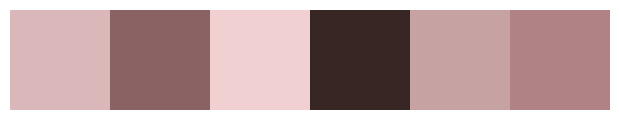

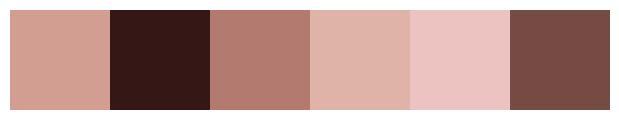

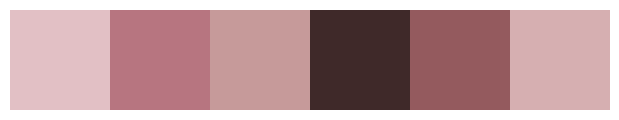

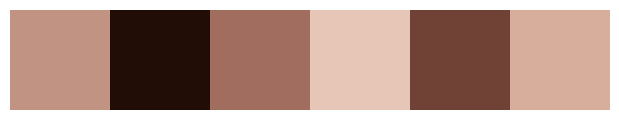

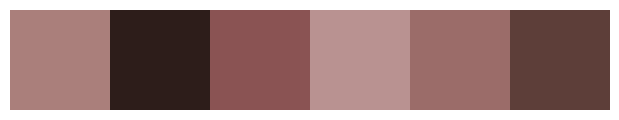

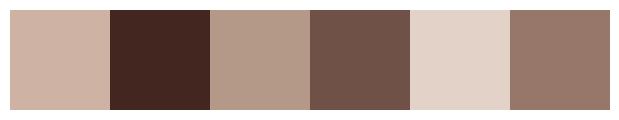

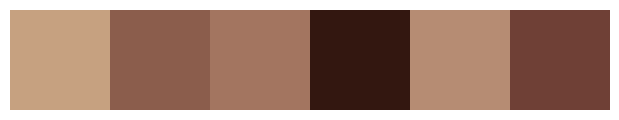

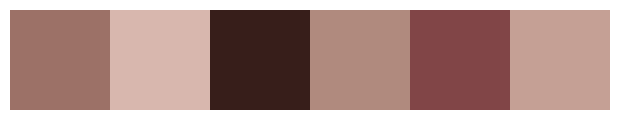

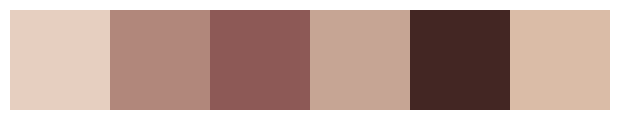

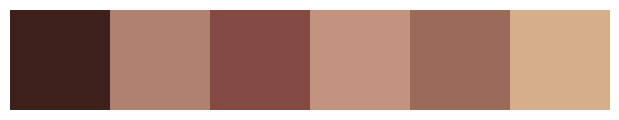

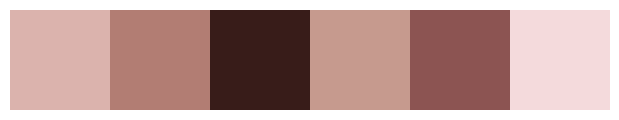

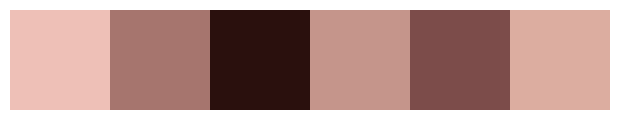

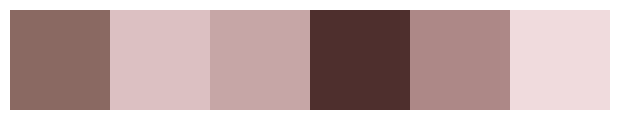

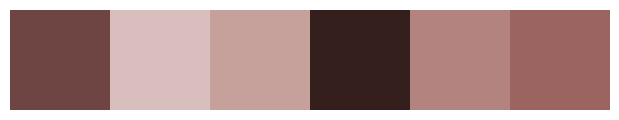

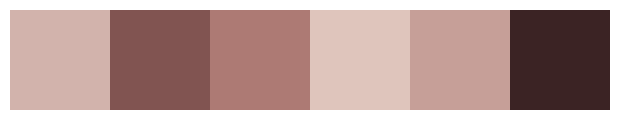

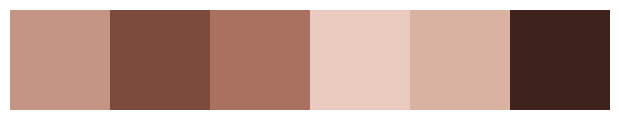

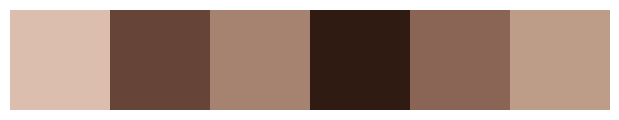

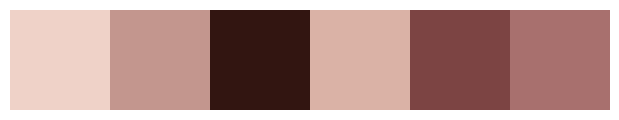

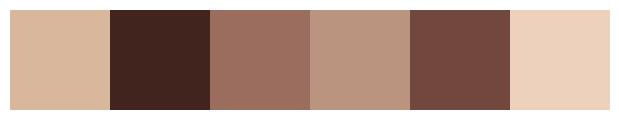

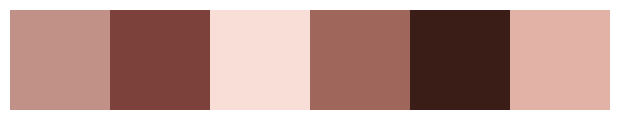

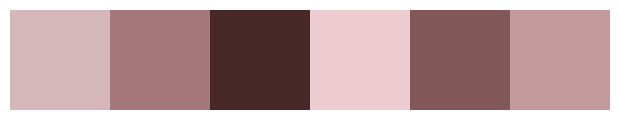

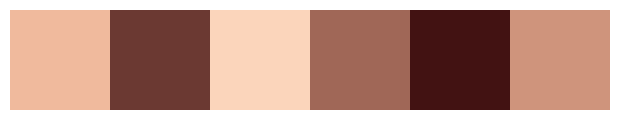

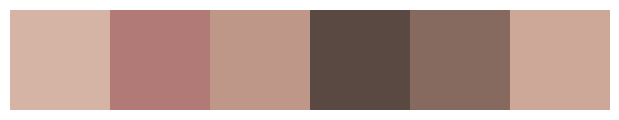

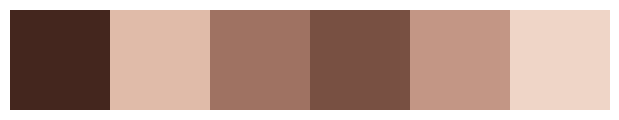

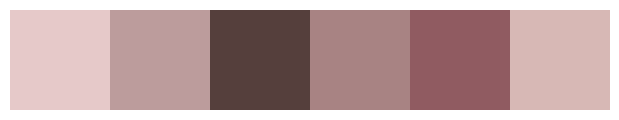

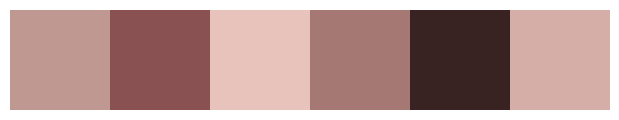

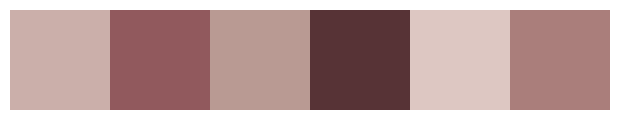

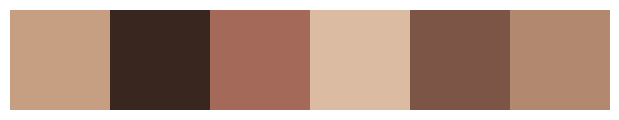

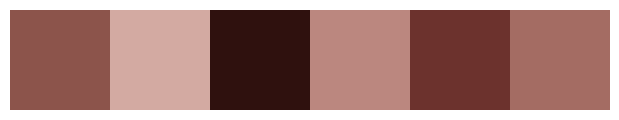

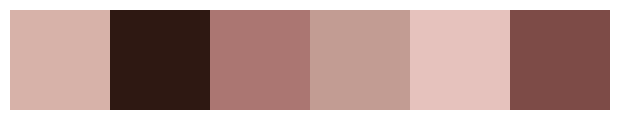

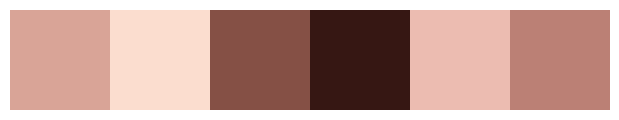

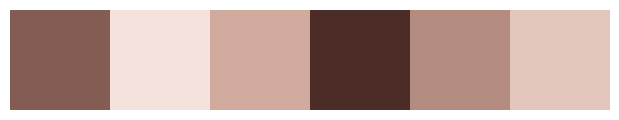

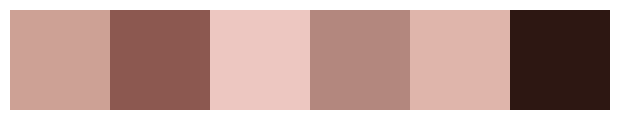

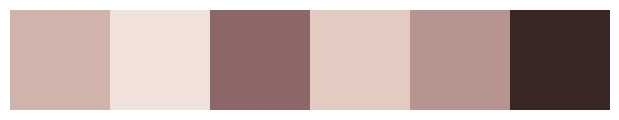

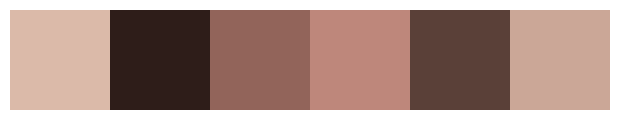

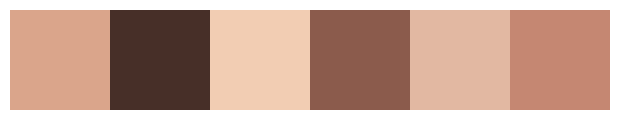

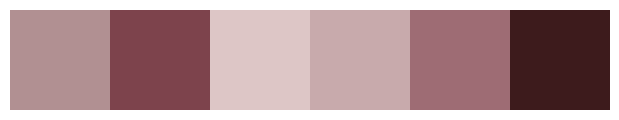

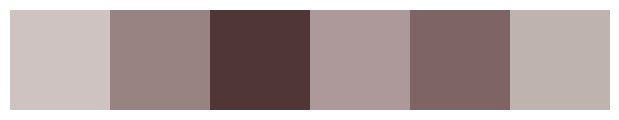

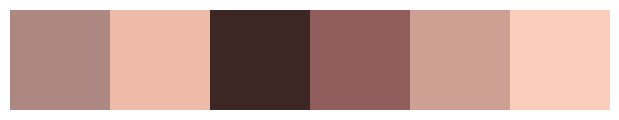

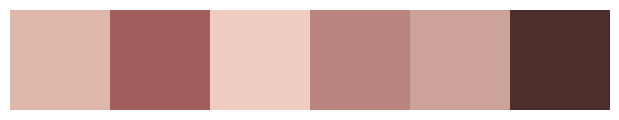

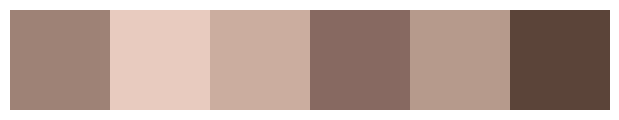

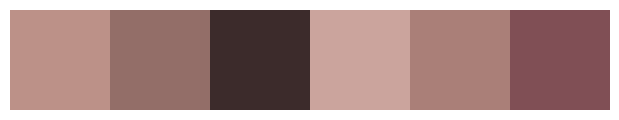

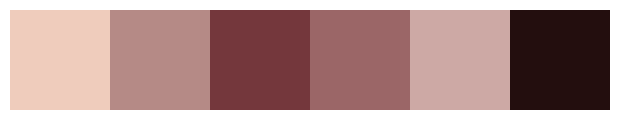

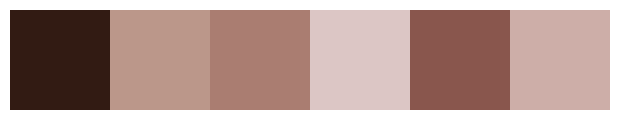

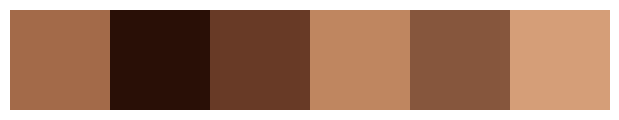

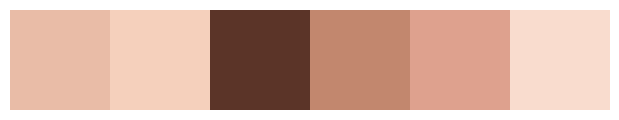

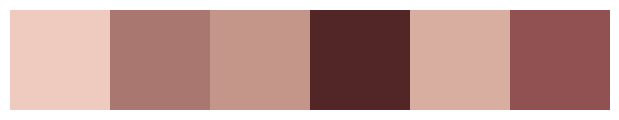

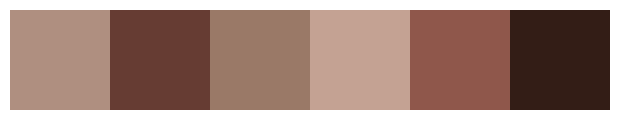

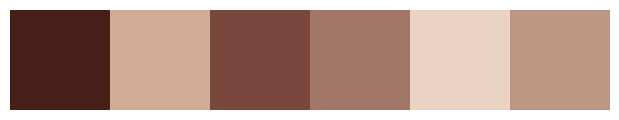

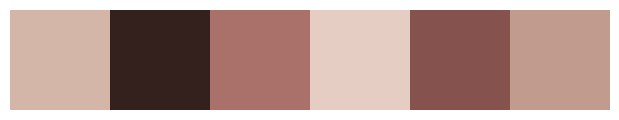

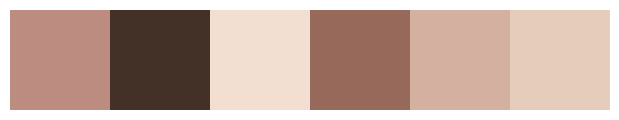

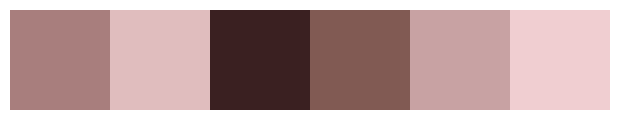

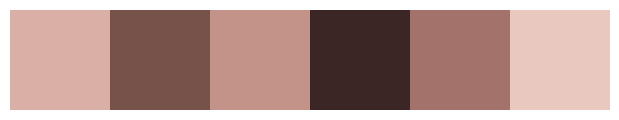

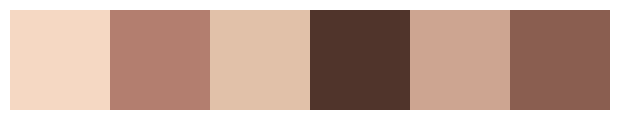

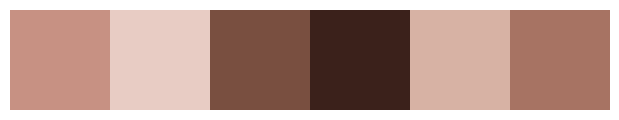

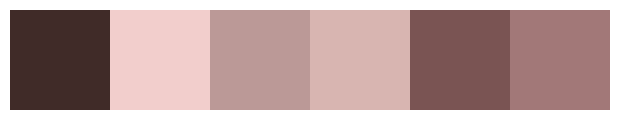

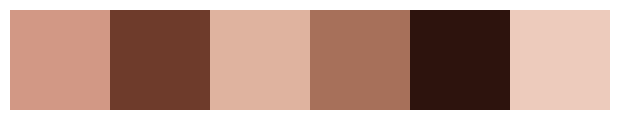

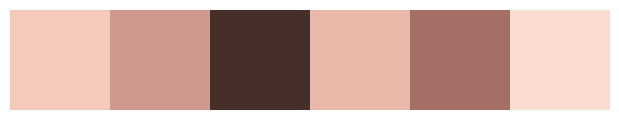

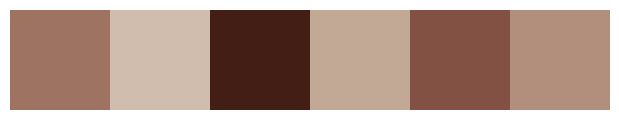

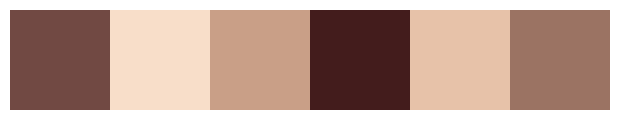

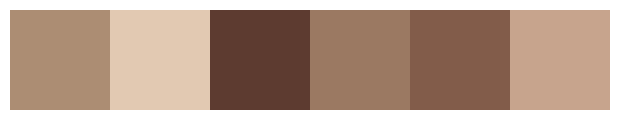

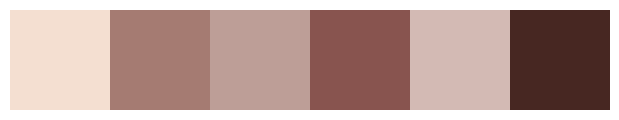

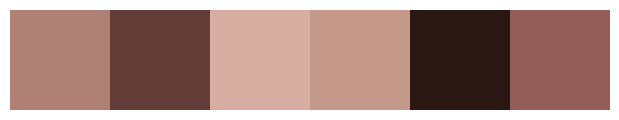

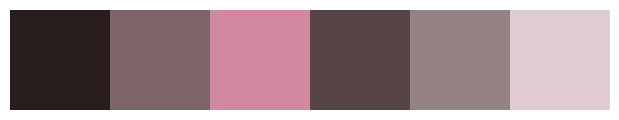

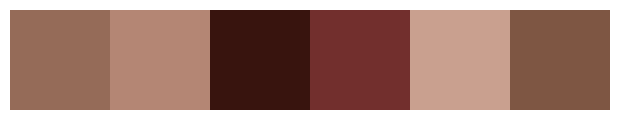

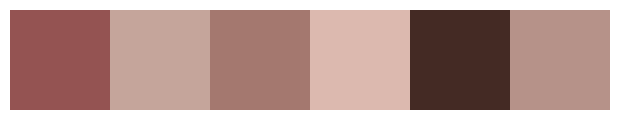

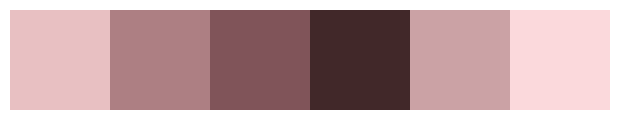

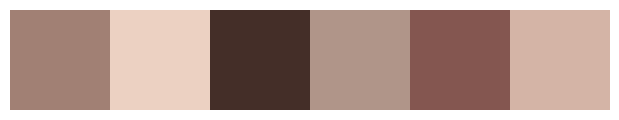

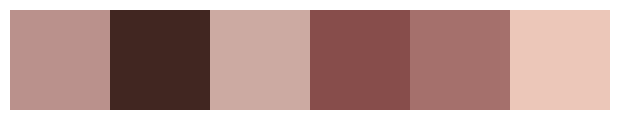

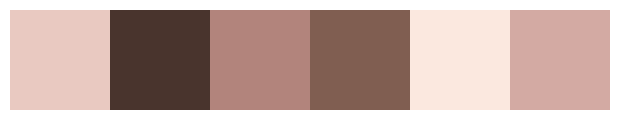

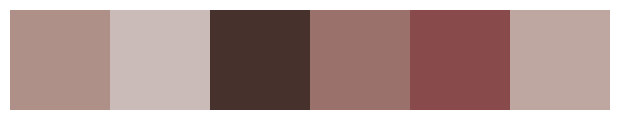

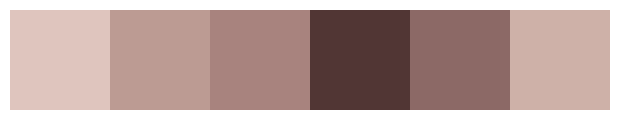

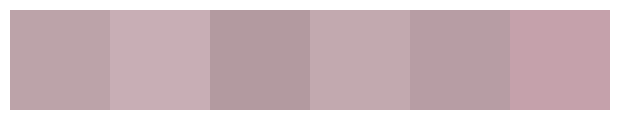

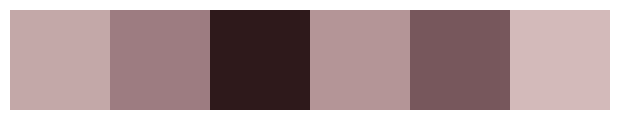

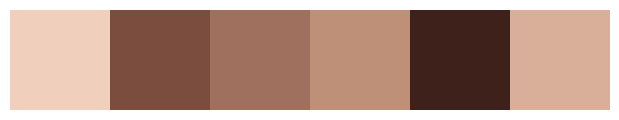

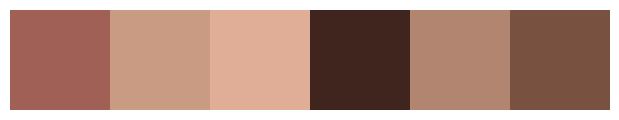

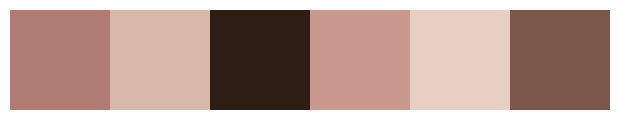

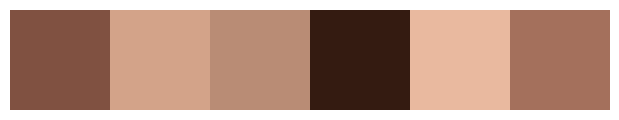

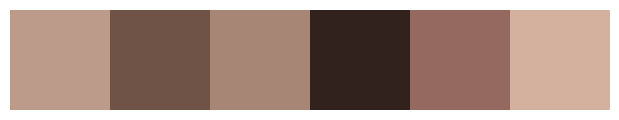

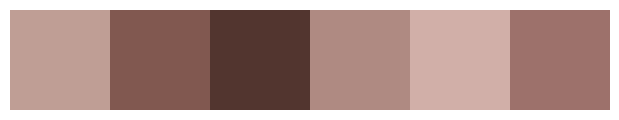

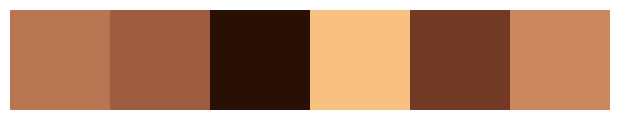

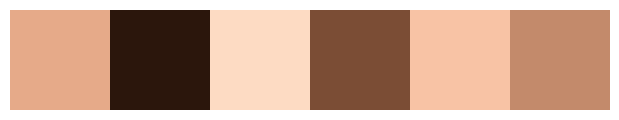

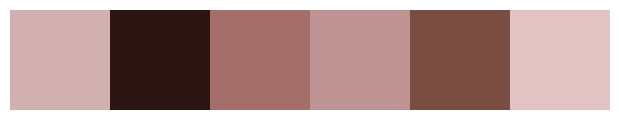

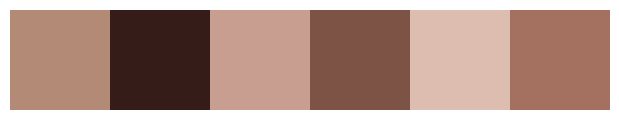

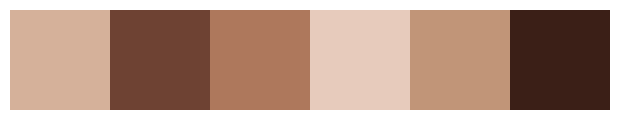

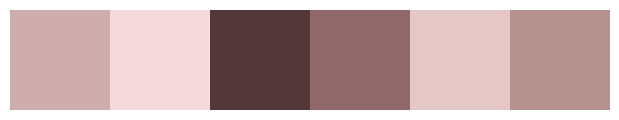

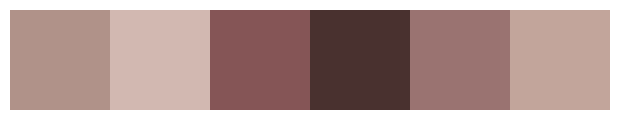

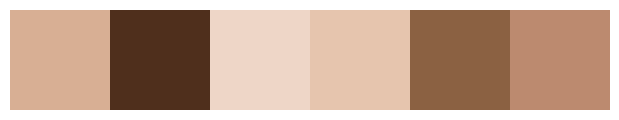

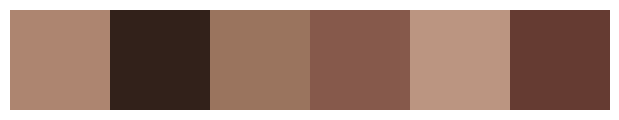

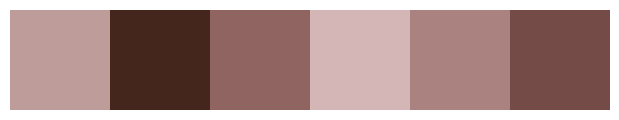

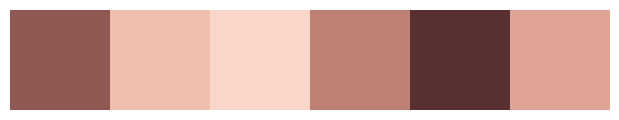

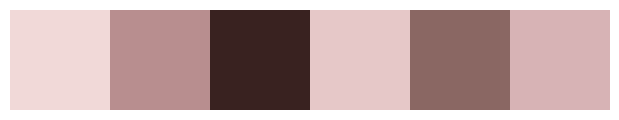

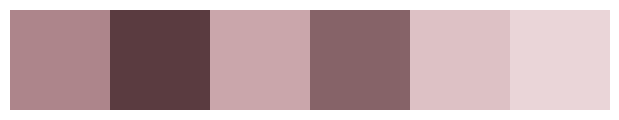

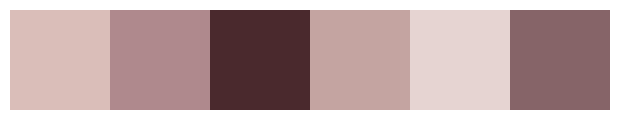

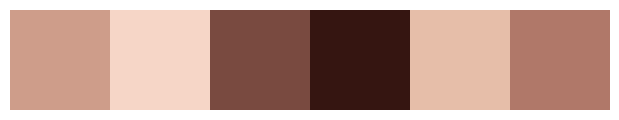

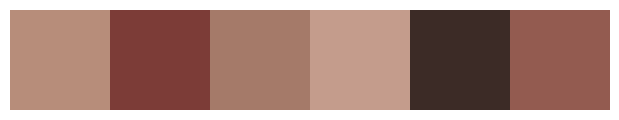

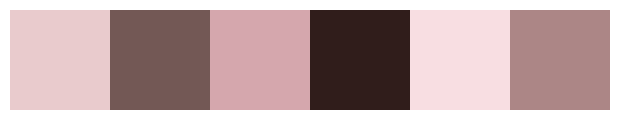

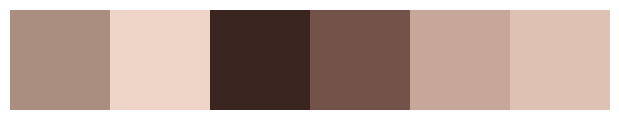

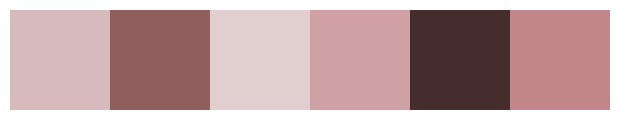

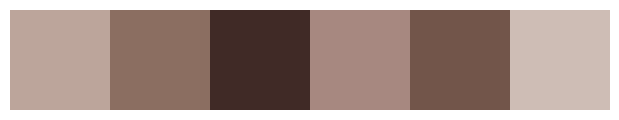

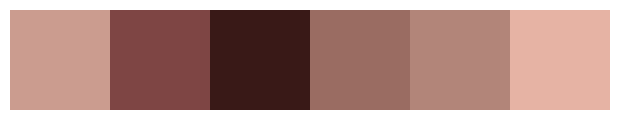

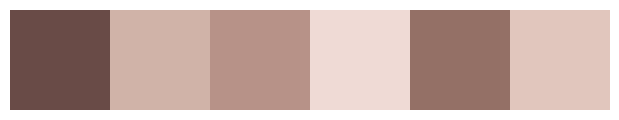

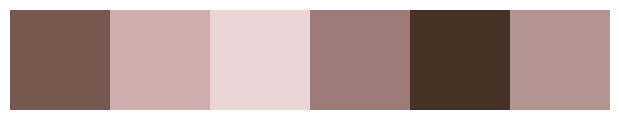

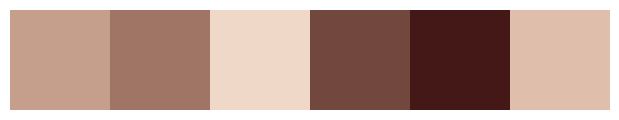

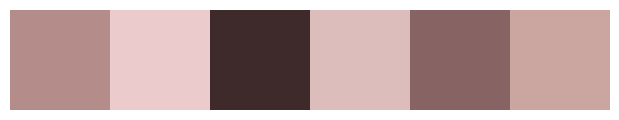

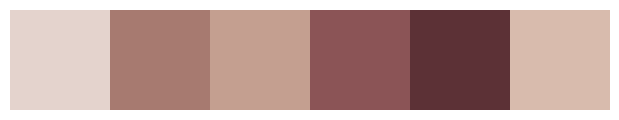

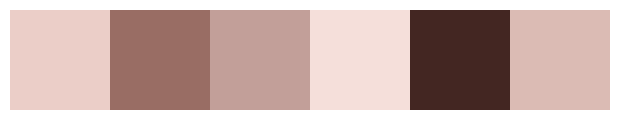

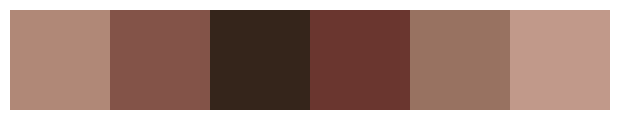

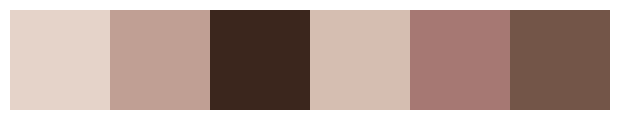

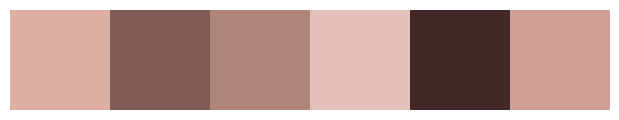

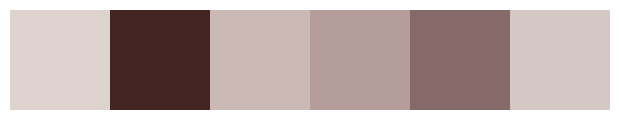

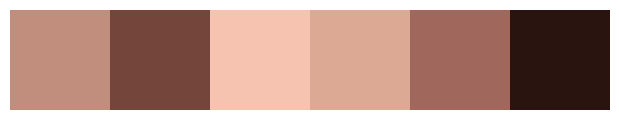

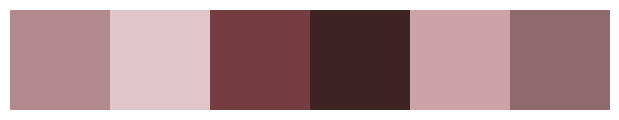

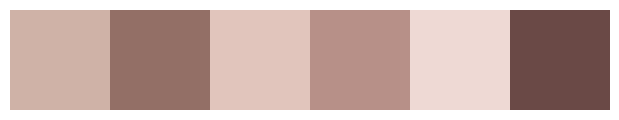

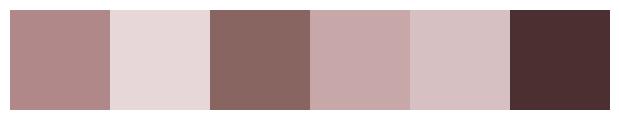

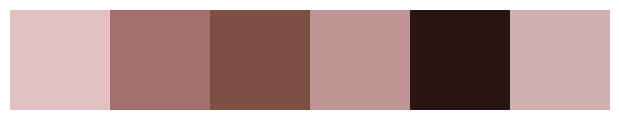

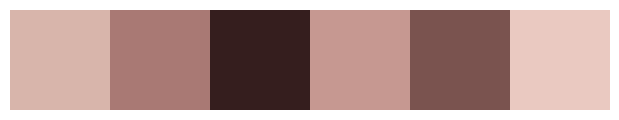

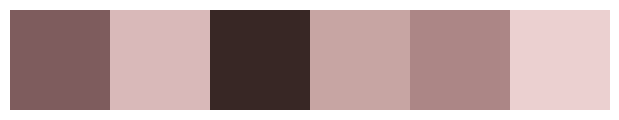

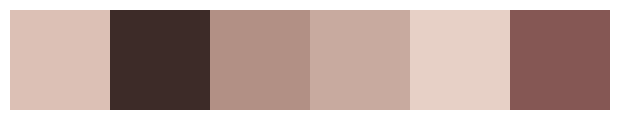

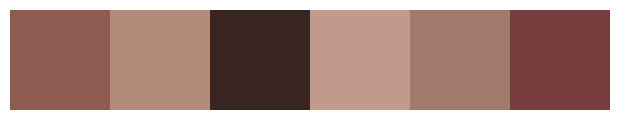

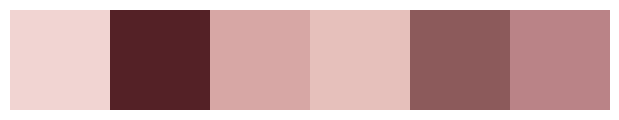

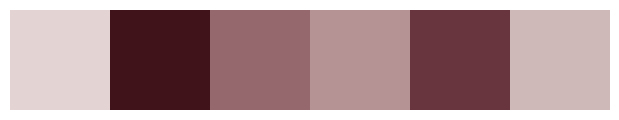

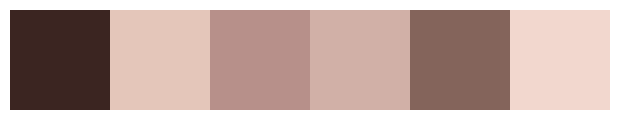

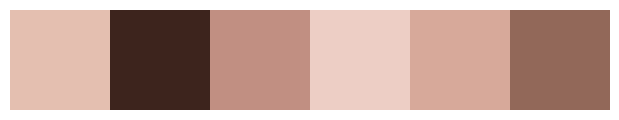

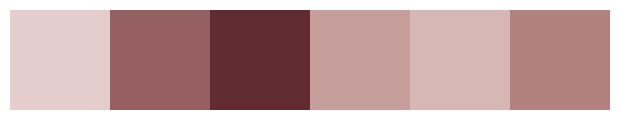

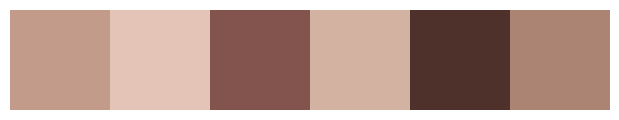

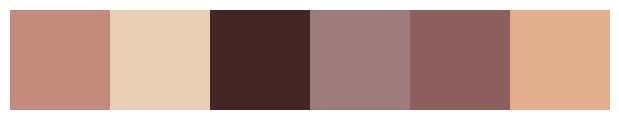

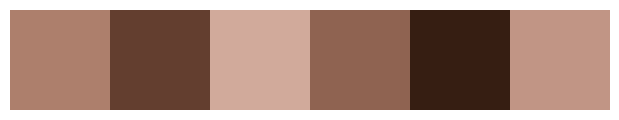

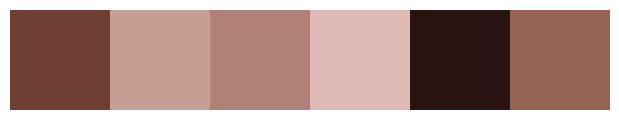

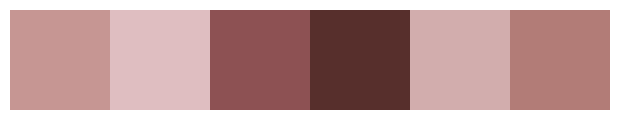

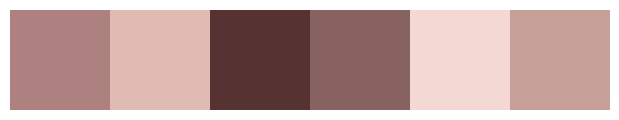

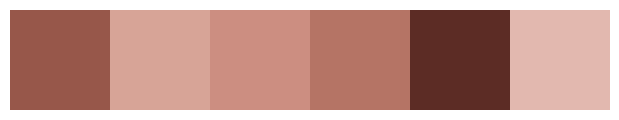

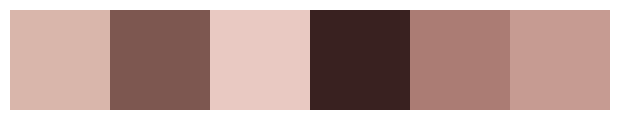

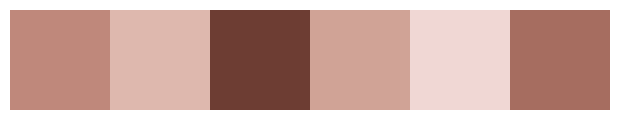

In [6]:
for folder in seasons:
    this_df = pd.DataFrame(columns=['H', 'S', 'V', 'L', 'A', 'B', 'C', 'M', 'Y', 'K', 'label'])
    
    for file in os.listdir(os.path.join(data_root, folder)):
        full_path = os.path.join(data_root, folder, file)
        
        palette = pc.create_palette(full_path)
        
        if palette is None:
            continue
        
        cmyk_palette = bgr2cmyk(palette)
        
        palette = np.array([palette], np.uint8)
        hsv_palette = cv2.cvtColor(palette, cv2.COLOR_BGR2HSV)
        lab_palette = cv2.cvtColor(palette, cv2.COLOR_BGR2LAB)
    
        mean_hsv = np.mean(hsv_palette, axis=1)[0]
        mean_lab = np.mean(lab_palette, axis=1)[0]
        mean_cmyk = np.mean(cmyk_palette, axis=0)
        
        row = np.concatenate((mean_hsv, mean_lab, mean_cmyk)).tolist()
        row.append(folder)
        this_df.loc[len(this_df)] = row
        
    print(f'{folder}: {len(this_df)} rows')
    this_df.to_csv(f'images/dataset/mean_{folder}.csv', index=False)

In [9]:
df = pd.DataFrame(columns=['H', 'S', 'V', 'L', 'A', 'B', 'C', 'M', 'Y', 'K', 'label'])

In [12]:
for folder in seasons:
    this_df = pd.read_csv(f'images/dataset/mean_{folder}.csv')
    df = pd.concat([df, this_df], ignore_index=True)

df.to_csv('images/dataset/mean.csv', index=False)

C:\Users\pomat\AppData\Local\Temp\ipykernel_11200\3105830458.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, this_df], ignore_index=True)


In [13]:
print(f'Finished creating dataset for {len(df)} images')

Finished creating dataset for 641 images


In [15]:
spring_df = pd.read_csv('images/dataset/mean_spring.csv')
summer_df = pd.read_csv('images/dataset/mean_summer.csv')
fall_df = pd.read_csv('images/dataset/mean_fall.csv')
winter_df = pd.read_csv('images/dataset/mean_winter.csv')

In [25]:
print(f'Spring: {len(spring_df)}')
print(f'Summer: {len(summer_df)}')
print(f'Fall: {len(fall_df)}')
print(f'Winter: {len(winter_df)}')

Spring: 172
Summer: 141
Fall: 133
Winter: 195


In [16]:
spring_df.head(10)

,H,S,V,L,A,B,C,M,Y,K,label
0,4.333333,100.333333,156.333333,128.166667,145.500000,140.166667,0.0,88.014557,100.051811,0.386928,spring
1,8.833333,114.166667,161.000000,135.000000,142.833333,144.333333,0.0,84.456776,114.167244,0.368627,spring
2,9.500000,128.500000,189.000000,151.166667,147.333333,151.333333,0.0,89.266550,128.540810,0.258824,spring
3,8.666667,123.000000,176.166667,141.166667,147.333333,149.500000,0.0,89.126756,123.186408,0.309150,spring
4,2.333333,72.666667,162.666667,140.833333,142.000000,135.166667,0.0,66.929817,72.699023,0.362092,spring
5,11.000000,111.833333,189.500000,159.666667,142.333333,149.500000,0.0,69.963827,111.701525,0.256863,spring
6,8.333333,72.166667,165.000000,148.000000,138.000000,138.500000,0.0,54.828396,71.959693,0.352941,spring
7,4.666667,85.166667,173.833333,149.166667,141.833333,137.333333,0.0,71.919377,85.035018,0.318301,spring
8,4.333333,80.666667,186.333333,159.000000,143.166667,138.166667,0.0,70.736543,80.688360,0.269281,spring
9,8.000000,71.833333,190.500000,167.833333,140.000000,140.500000,0.0,52.827417,71.886475,0.252941,spring


In [17]:
spring_df.describe()

,H,S,V,L,A,B,C,M,Y,K
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.0,172.000000,172.000000,172.000000
mean,22.775194,84.878876,172.595930,148.589147,141.831395,139.979651,0.0,66.964767,84.178079,0.323153
std,37.967273,18.115085,13.984455,13.555393,2.770047,4.638218,0.0,11.932301,18.852211,0.054841
min,1.333333,34.333333,137.666667,116.833333,132.833333,129.666667,0.0,32.818911,32.176857,0.179739
25%,6.166667,72.125000,163.208333,140.291667,140.291667,136.958333,0.0,59.055901,71.650889,0.286928
50%,8.000000,81.000000,172.750000,147.833333,141.916667,139.500000,0.0,66.281389,80.917502,0.322549
75%,11.041667,99.166667,181.833333,157.708333,143.208333,142.958333,0.0,74.155093,99.036339,0.359967
max,176.166667,134.333333,209.166667,186.000000,150.500000,153.500000,0.0,96.856749,134.420078,0.460131


In [18]:
summer_df.head(10)

,H,S,V,L,A,B,C,M,Y,K,label
0,37.000000,111.833333,151.833333,126.333333,143.000000,142.833333,0.0,88.715955,110.904449,0.404575,summer
1,6.333333,95.000000,166.500000,140.333333,143.333333,141.000000,0.0,78.045125,94.986296,0.347059,summer
2,2.000000,55.666667,164.333333,148.333333,138.833333,133.500000,0.0,52.378958,55.723644,0.355556,summer
3,8.000000,79.833333,164.500000,145.333333,139.166667,139.166667,0.0,60.066964,79.876567,0.354902,summer
4,34.333333,72.500000,174.500000,152.166667,142.000000,136.833333,0.0,64.183117,71.932427,0.315686,summer
5,8.833333,60.666667,147.000000,136.833333,135.500000,136.333333,0.0,43.714953,60.543678,0.423529,summer
6,6.833333,72.000000,171.666667,151.833333,140.333333,138.833333,0.0,57.451300,71.904475,0.326797,summer
7,10.000000,91.000000,164.833333,143.333333,139.166667,143.000000,0.0,61.372808,90.916633,0.353595,summer
8,5.666667,70.333333,186.333333,162.666667,141.000000,138.500000,0.0,56.956425,70.478000,0.269281,summer
9,59.166667,48.833333,153.000000,141.333333,137.833333,130.666667,0.0,47.617657,44.301830,0.400000,summer


In [19]:
summer_df.describe()

,H,S,V,L,A,B,C,M,Y,K
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.0,141.000000,141.000000,141.000000
mean,35.074468,78.143026,165.804965,144.836879,140.862884,137.910165,0.0,63.857513,77.029454,0.349784
std,51.363413,18.770582,13.230196,12.756549,2.763300,4.680444,0.0,12.344076,19.569644,0.051883
min,0.833333,40.666667,134.666667,114.333333,134.166667,129.833333,0.0,38.295321,37.613817,0.198693
25%,6.000000,63.000000,157.500000,136.833333,139.000000,134.166667,0.0,56.082565,62.089363,0.316340
50%,8.833333,74.666667,166.166667,145.333333,140.666667,137.666667,0.0,61.341142,72.721498,0.348366
75%,35.666667,90.666667,174.333333,152.166667,142.833333,141.000000,0.0,70.812837,90.868061,0.382353
max,177.666667,136.500000,204.333333,181.500000,147.333333,152.500000,0.0,98.284588,136.589292,0.471895


In [20]:
fall_df.head(10)

,H,S,V,L,A,B,C,M,Y,K,label
0,8.833333,100.166667,164.500000,139.000000,142.333333,145.333333,0.0,70.617393,100.333620,0.354902,fall
1,4.666667,94.833333,169.333333,142.166667,144.333333,139.833333,0.0,77.494324,94.656138,0.335948,fall
2,4.500000,77.000000,165.833333,144.833333,140.666667,136.833333,0.0,63.803623,76.853606,0.349673,fall
3,5.500000,80.833333,165.833333,143.666667,140.666667,138.166667,0.0,68.371044,80.720678,0.349673,fall
4,9.333333,87.500000,168.500000,147.333333,139.166667,141.666667,0.0,63.471767,87.313546,0.339216,fall
5,11.500000,100.333333,179.500000,154.000000,139.833333,146.833333,0.0,62.492095,100.325419,0.296078,fall
6,9.333333,118.833333,149.666667,123.000000,142.333333,145.000000,0.0,83.047470,118.702960,0.413072,fall
7,9.500000,112.166667,185.000000,152.833333,144.333333,147.000000,0.0,78.515555,112.279725,0.274510,fall
8,2.500000,92.333333,142.500000,118.833333,143.166667,136.500000,0.0,85.493689,92.353546,0.441176,fall
9,5.333333,73.833333,173.000000,151.000000,140.500000,137.166667,0.0,61.843624,73.877811,0.321569,fall


In [21]:
fall_df.describe()

,H,S,V,L,A,B,C,M,Y,K
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.0,133.000000,133.000000,133.000000
mean,13.008772,98.515038,166.098997,139.973684,142.741855,142.426065,0.0,74.921798,98.255650,0.348631
std,20.450660,19.827045,14.143609,14.407297,2.415880,4.738330,0.0,12.305029,20.210398,0.055465
min,1.833333,56.000000,122.333333,99.500000,137.333333,130.166667,0.0,43.797706,49.963332,0.193464
25%,6.333333,86.333333,157.166667,130.666667,141.166667,138.833333,0.0,66.242731,85.330009,0.307843
50%,8.333333,95.500000,166.333333,140.000000,143.000000,142.000000,0.0,75.359062,95.596989,0.347712
75%,10.166667,112.500000,176.500000,149.833333,144.333333,145.166667,0.0,82.792856,112.552735,0.383660
max,174.333333,158.000000,205.666667,182.333333,148.500000,154.500000,0.0,104.113678,158.060184,0.520261


In [22]:
winter_df.head(10)

,H,S,V,L,A,B,C,M,Y,K,label
0,5.833333,108.166667,166.000000,135.000000,145.833333,142.166667,0.0,89.243187,108.268675,0.349020,winter
1,7.333333,97.000000,157.500000,133.833333,142.000000,141.666667,0.0,76.780716,97.140531,0.382353,winter
2,9.166667,88.500000,147.166667,127.833333,139.166667,141.666667,0.0,61.866546,88.577101,0.422876,winter
3,4.000000,65.000000,182.500000,162.333333,140.666667,136.333333,0.0,54.793562,65.131544,0.284314,winter
4,12.000000,66.000000,86.333333,82.000000,131.833333,134.833333,0.0,40.420719,66.036030,0.661438,winter
5,61.500000,77.000000,157.666667,136.000000,142.833333,135.500000,0.0,73.806553,75.953674,0.381699,winter
6,146.666667,68.666667,163.333333,141.833333,143.833333,131.333333,0.0,67.641537,57.273616,0.359477,winter
7,8.333333,97.500000,164.500000,137.333333,142.833333,143.500000,0.0,71.673799,97.428205,0.354902,winter
8,5.000000,77.333333,193.833333,165.166667,144.166667,139.666667,0.0,65.898260,77.491157,0.239869,winter
9,13.500000,105.166667,152.833333,135.333333,136.000000,146.166667,0.0,61.827902,105.099015,0.400654,winter


In [24]:
winter_df.describe()

,H,S,V,L,A,B,C,M,Y,K
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.0,195.000000,195.000000,195.000000
mean,28.652137,82.373504,163.793162,141.538462,141.561538,138.614530,0.0,67.230498,81.524290,0.357674
std,41.947281,19.239454,16.159880,15.694931,2.676245,4.427343,0.0,12.608856,20.125662,0.063372
min,2.000000,36.500000,86.333333,82.000000,131.833333,128.000000,0.0,36.393903,27.027962,0.193464
25%,6.250000,68.333333,156.833333,133.833333,140.000000,135.750000,0.0,59.002403,67.328562,0.321569
50%,8.500000,81.333333,165.500000,143.000000,141.833333,138.500000,0.0,67.146823,81.318176,0.350980
75%,32.833333,95.000000,173.000000,151.500000,143.083333,141.666667,0.0,75.063923,94.826347,0.384967
max,177.833333,156.000000,205.666667,177.333333,148.500000,155.000000,0.0,103.059213,156.118765,0.661438


In [26]:
df = df.sample(frac=1).reset_index(drop=True)
df.to_csv('images/dataset/mean_shuffled.csv', index=False)

In [27]:
df.head(10)

,H,S,V,L,A,B,C,M,Y,K,label
0,8.166667,136.166667,163.833333,128.333333,147.166667,149.166667,0.0,102.454392,136.065927,0.357516,fall
1,117.666667,40.666667,152.666667,142.666667,136.500000,130.166667,0.0,39.923009,37.613817,0.401307,summer
2,10.000000,71.833333,146.333333,133.666667,136.166667,138.666667,0.0,49.786713,71.709655,0.426144,summer
3,33.833333,71.333333,165.333333,144.333333,141.166667,136.333333,0.0,64.242797,70.619257,0.351634,winter
4,119.333333,34.333333,197.666667,185.000000,137.333333,130.833333,0.0,33.622171,32.176857,0.224837,spring
5,8.000000,72.666667,178.333333,158.833333,138.833333,139.500000,0.0,54.458960,72.601264,0.300654,spring
6,62.000000,63.000000,164.000000,145.166667,140.333333,134.166667,0.0,55.542731,62.089363,0.356863,summer
7,175.333333,58.166667,147.666667,132.333333,140.166667,129.833333,0.0,58.233319,50.612433,0.420915,summer
8,7.333333,97.000000,157.500000,133.833333,142.000000,141.666667,0.0,76.780716,97.140531,0.382353,winter
9,5.333333,99.166667,163.500000,136.000000,144.166667,140.500000,0.0,80.928873,99.104949,0.358824,spring


In [28]:
print('all seasons:', len(df))

all seasons: 641
